# Name: Somesh Banerjee

# About Dataset
The data was downloaded from the extensive cricket data website cricsheet.org in JSON format. I used the pandas Python library to transform the match data into ball-by-ball data with several relevant fields. This allows for the data to be used to train regression models etc

#Installations

In [6]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.3 MB/s eta 0:00:00


In [7]:
!pip install xgboost

In [8]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.3 MB/s eta 0:00:00


#Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
from matplotlib.pyplot import figure

#import matplotlib.pylab as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
import shap

# 1. Data Cleaning and Feature Selection

In [10]:
# Loading the dataset from the github repository

url = 'https://raw.githubusercontent.com/Somesh-Banerjee-neu/raw-csv-file/main/ball_by_ball_it20.csv'

df = pd.read_csv(url)

df.head() #Added code to display the initial rows of the dataset for inspection

,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,1,BA King,...,South Africa,1,1,0,1,0,NaN,NaN,1,1
1,1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,...,South Africa,1,1,1,1,1,NaN,NaN,1,1
2,2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,3,BA King,...,South Africa,1,0,1,0,1,1.0,2.0,0,1
3,3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,...,South Africa,1,0,1,1,1,NaN,NaN,0,1
4,4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,...,South Africa,1,4,1,2,1,NaN,NaN,4,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425119 entries, 0 to 425118
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               425119 non-null  int64  
 1   Match ID                 425119 non-null  int64  
 2   Date                     425119 non-null  object 
 3   Venue                    425119 non-null  object 
 4   Bat First                425119 non-null  object 
 5   Bat Second               425119 non-null  object 
 6   Innings                  425119 non-null  int64  
 7   Over                     425119 non-null  int64  
 8   Ball                     425119 non-null  int64  
 9   Batter                   425119 non-null  object 
 10  Non Striker              425119 non-null  object 
 11  Bowler                   425119 non-null  object 
 12  Batter Runs              425119 non-null  int64  
 13  Extra Runs               425119 non-null  int64  
 14  Runs

In [12]:
df.nunique()

Unnamed: 0                 425119
Match ID                     1842
Date                         1115
Venue                         183
Bat First                      96
Bat Second                     95
Innings                         2
Over                           20
Ball                            8
Batter                       2899
Non Striker                  2854
Bowler                       2156
Batter Runs                     8
Extra Runs                      7
Runs From Ball                  9
Ball Rebowled                   2
Extra Type                     10
Wicket                          2
Method                         12
Player Out                   2683
Innings Runs                  267
Innings Wickets                12
Target Score                  212
Runs to Get                   295
Balls Remaining               122
Winner                         89
Chased Successfully             2
Total Batter Runs             160
Total Non Striker Runs        143
Batter Balls F

In [13]:
df.dtypes

Unnamed: 0                   int64
Match ID                     int64
Date                        object
Venue                       object
Bat First                   object
Bat Second                  object
Innings                      int64
Over                         int64
Ball                         int64
Batter                      object
Non Striker                 object
Bowler                      object
Batter Runs                  int64
Extra Runs                   int64
Runs From Ball               int64
Ball Rebowled                int64
Extra Type                  object
Wicket                       int64
Method                      object
Player Out                  object
Innings Runs                 int64
Innings Wickets              int64
Target Score                 int64
Runs to Get                float64
Balls Remaining              int64
Winner                      object
Chased Successfully          int64
Total Batter Runs            int64
Total Non Striker Ru

# 4. Data Cleaning & Feature Engineering
The Data needs to be cleaned before training the model on it.

For predicting the Scores accurately, I consider the following features:

Batting Team (batting_team)
Bowling Team (bowling_team)
Total Runs (runs)
Total Wickets (wickets)
Balls (Ball)
Along with these, in order to increase the accuracy of prediction over the complete match and introduce non-linearity in the dataset, the following features are computed and used for training the model:

Overs (overs)
Runs Last 5 Overs (runs_last_5_overs)
Wickets Last 5 Overs (wickets_last_5_overs)
# 4.1. Computing Overs, Runs in last 5 overs & Wickets in last 5 overs

In [14]:
# Compute Overs for each Match innings
df['overs'] = df['Over'].astype(str) + '.' + df['Ball'].astype(str)
df['overs'] = pd.to_numeric(df['overs'], errors='coerce')-1

# Compute Runs in last 5 overs & Wickets in last 5 overs
for index, row in df.iterrows():
    if df['Balls Remaining'][index] < 89:
        df.at[index, 'runs_last_5_overs'] = df['Innings Runs'][index] - df['Innings Runs'][index-30]  # assign the value
        df.at[index, 'wickets_last_5_overs'] = df['Innings Wickets'][index] - df['Innings Wickets'][index-30]  # assign the value
    else:
        df.at[index, 'runs_last_5_overs'] = df['Innings Runs'][index]  # assign the value
        df.at[index, 'wickets_last_5_overs'] = df['Innings Wickets'][index]  # assign the value

df

,Unnamed: 0,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,...,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball,overs,runs_last_5_overs,wickets_last_5_overs
0,0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,1,BA King,...,0,1,0,NaN,NaN,1,1,0.1,1.0,0.0
1,1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,...,1,1,1,NaN,NaN,1,1,0.2,2.0,0.0
2,2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,3,BA King,...,1,0,1,1.0,2.0,0,1,0.3,2.0,1.0
3,3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,...,1,1,1,NaN,NaN,0,1,0.4,2.0,1.0
4,4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,...,1,2,1,NaN,NaN,4,1,0.5,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425114,425114,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,2,TK Curran,...,2,9,2,NaN,NaN,0,1,19.2,23.0,5.0
425115,425115,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,3,TK Curran,...,2,10,2,NaN,NaN,1,1,19.3,24.0,5.0
425116,425116,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,4,S Mahmood,...,12,3,10,NaN,NaN,0,1,19.4,24.0,4.0
425117,425117,1187667,2019-11-05,Saxton Oval,New Zealand,England,2,20,5,S Mahmood,...,12,4,10,NaN,NaN,1,1,19.5,24.0,4.0


# 4.2. Removing irrelevant features
Here, we certain columns such as, ['Unnamed: 0', 'Match ID', 'Date', 'Venue','Innings', 'Batter', 'Non Striker', 'Bowler', 'Over', 'Ball', 'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled', 'Extra Type', 'Wicket', 'Method', 'Player Out', 'Runs to Get', 'Balls Remaining', 'Winner', 'Chased Successfully', 'Total Batter Runs', 'Total Non Striker Runs', 'Batter Balls Faced', 'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced', 'Bowler Runs Conceded', 'Valid Ball'] won't provide any relevant information for model to train, so we remove them.

In [15]:
import pandas as pd

def remove_irrelevant_columns(df, irrelevant_columns):
    print(f'Before Removing Irrelevant Columns : {df.shape}')
    df = df.drop(irrelevant_columns, axis=1)  # Drop Irrelevant Columns
    print(f'After Removing Irrelevant Columns : {df.shape}')
    return df

irrelevant = ['Unnamed: 0', 'Match ID', 'Date', 'Venue','Innings', 'Batter', 'Non Striker', 'Bowler', 'Over', 'Ball',
       'Batter Runs', 'Extra Runs', 'Runs From Ball', 'Ball Rebowled',
       'Extra Type', 'Wicket', 'Method', 'Player Out', 'Runs to Get', 'Balls Remaining',
       'Winner', 'Chased Successfully', 'Total Batter Runs',
       'Total Non Striker Runs', 'Batter Balls Faced',
       'Non Striker Balls Faced', 'Player Out Runs', 'Player Out Balls Faced',
       'Bowler Runs Conceded', 'Valid Ball']
result_df = remove_irrelevant_columns(df, irrelevant)
print(result_df.head(124))
df=result_df

Before Removing Irrelevant Columns : (425119, 38)
After Removing Irrelevant Columns : (425119, 8)
       Bat First    Bat Second  Innings Runs  Innings Wickets  Target Score  \
0    West Indies  South Africa             1                0           259   
1    West Indies  South Africa             2                0           259   
2    West Indies  South Africa             2                1           259   
3    West Indies  South Africa             2                1           259   
4    West Indies  South Africa             6                1           259   
..           ...           ...           ...              ...           ...   
119  West Indies  South Africa           243                5           259   
120  West Indies  South Africa           249                5           259   
121  West Indies  South Africa           251                5           259   
122  West Indies  South Africa           252                5           259   
123  West Indies  South Africa   

# 4.3. Removing Non-Consistent Teams
The teams that appears very rarely onto the ODI table may affect the performance and accuracy of the model. So these teams are to be analyzed and removed from the training data.

After analysis of data the following teams where Consistent:

Afghanistan
Australia
Bangladesh
England
India
Ireland
New Zealand
Pakistan
South Africa
Sri Lanka
West Indies
Zimbabwe

In [16]:
# Define Consistent Teams
const_teams = ['Afghanistan', 'Australia', 'Bangladesh',
               'England', 'India', 'Ireland', 'New Zealand', 'Pakistan',
               'South Africa', 'Sri Lanka', 'West Indies', 'Zimbabwe']

In [17]:
print(f'Before Removing Inconsistent Teams : {df.shape}')

# Remove the Non-Consistent Teams
df = df[(df['Bat First'].isin(const_teams)) & (df['Bat Second'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {df.shape}')

print(f"Consistent Teams : \n{df['Bat First'].unique()}")

df.head()

Before Removing Inconsistent Teams : (425119, 8)
After Removing Irrelevant Columns : (201431, 8)
Consistent Teams : 
['West Indies' 'Sri Lanka' 'England' 'Bangladesh' 'India' 'Afghanistan'
 'New Zealand' 'Pakistan' 'South Africa' 'Australia' 'Zimbabwe' 'Ireland']


,Bat First,Bat Second,Innings Runs,Innings Wickets,Target Score,overs,runs_last_5_overs,wickets_last_5_overs
0,West Indies,South Africa,1,0,259,0.1,1.0,0.0
1,West Indies,South Africa,2,0,259,0.2,2.0,0.0
2,West Indies,South Africa,2,1,259,0.3,2.0,1.0
3,West Indies,South Africa,2,1,259,0.4,2.0,1.0
4,West Indies,South Africa,6,1,259,0.5,6.0,1.0


# 4.4. Remove First 5 Overs of every match
The first 5 overs of every match cannot contribute or are not very impactfull to the scores of the match. Hence the first 5 overs of each match are removed.

NOTE: Due to this the final model might not give very accurate results for the first 5 overs of the match.

In [18]:
print(f'Before Removing Overs : {df.shape}')

df = df[df['overs'] >= 5.0]
print(f'After Removing Overs : {df.shape}')

df.head()

Before Removing Overs : (201431, 8)
After Removing Overs : (147810, 8)


,Bat First,Bat Second,Innings Runs,Innings Wickets,Target Score,overs,runs_last_5_overs,wickets_last_5_overs
31,West Indies,South Africa,57,1,259,5.1,57.0,1.0
32,West Indies,South Africa,61,1,259,5.2,59.0,0.0
33,West Indies,South Africa,62,1,259,5.3,60.0,0.0
34,West Indies,South Africa,62,1,259,5.4,56.0,0.0
35,West Indies,South Africa,62,1,259,5.5,52.0,0.0


# 4.5. Correlation between the final features
Plotting a Correlation Matrix of current data using Seaborn heatmap module.

<Axes: >

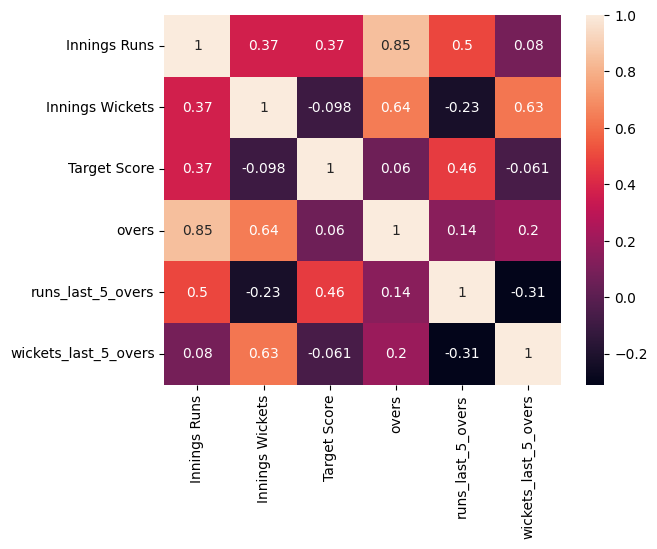

In [19]:
from seaborn import heatmap

numerical_df = df.select_dtypes(include=['int64', 'float64'])
heatmap(data=numerical_df.corr(), annot=True)

<Axes: >

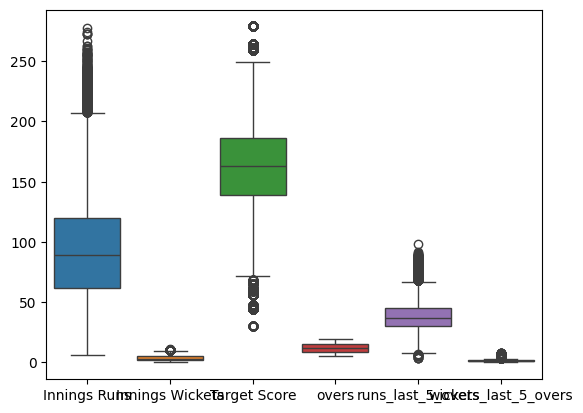

In [20]:
import seaborn as sns
sns.boxplot(data=df)

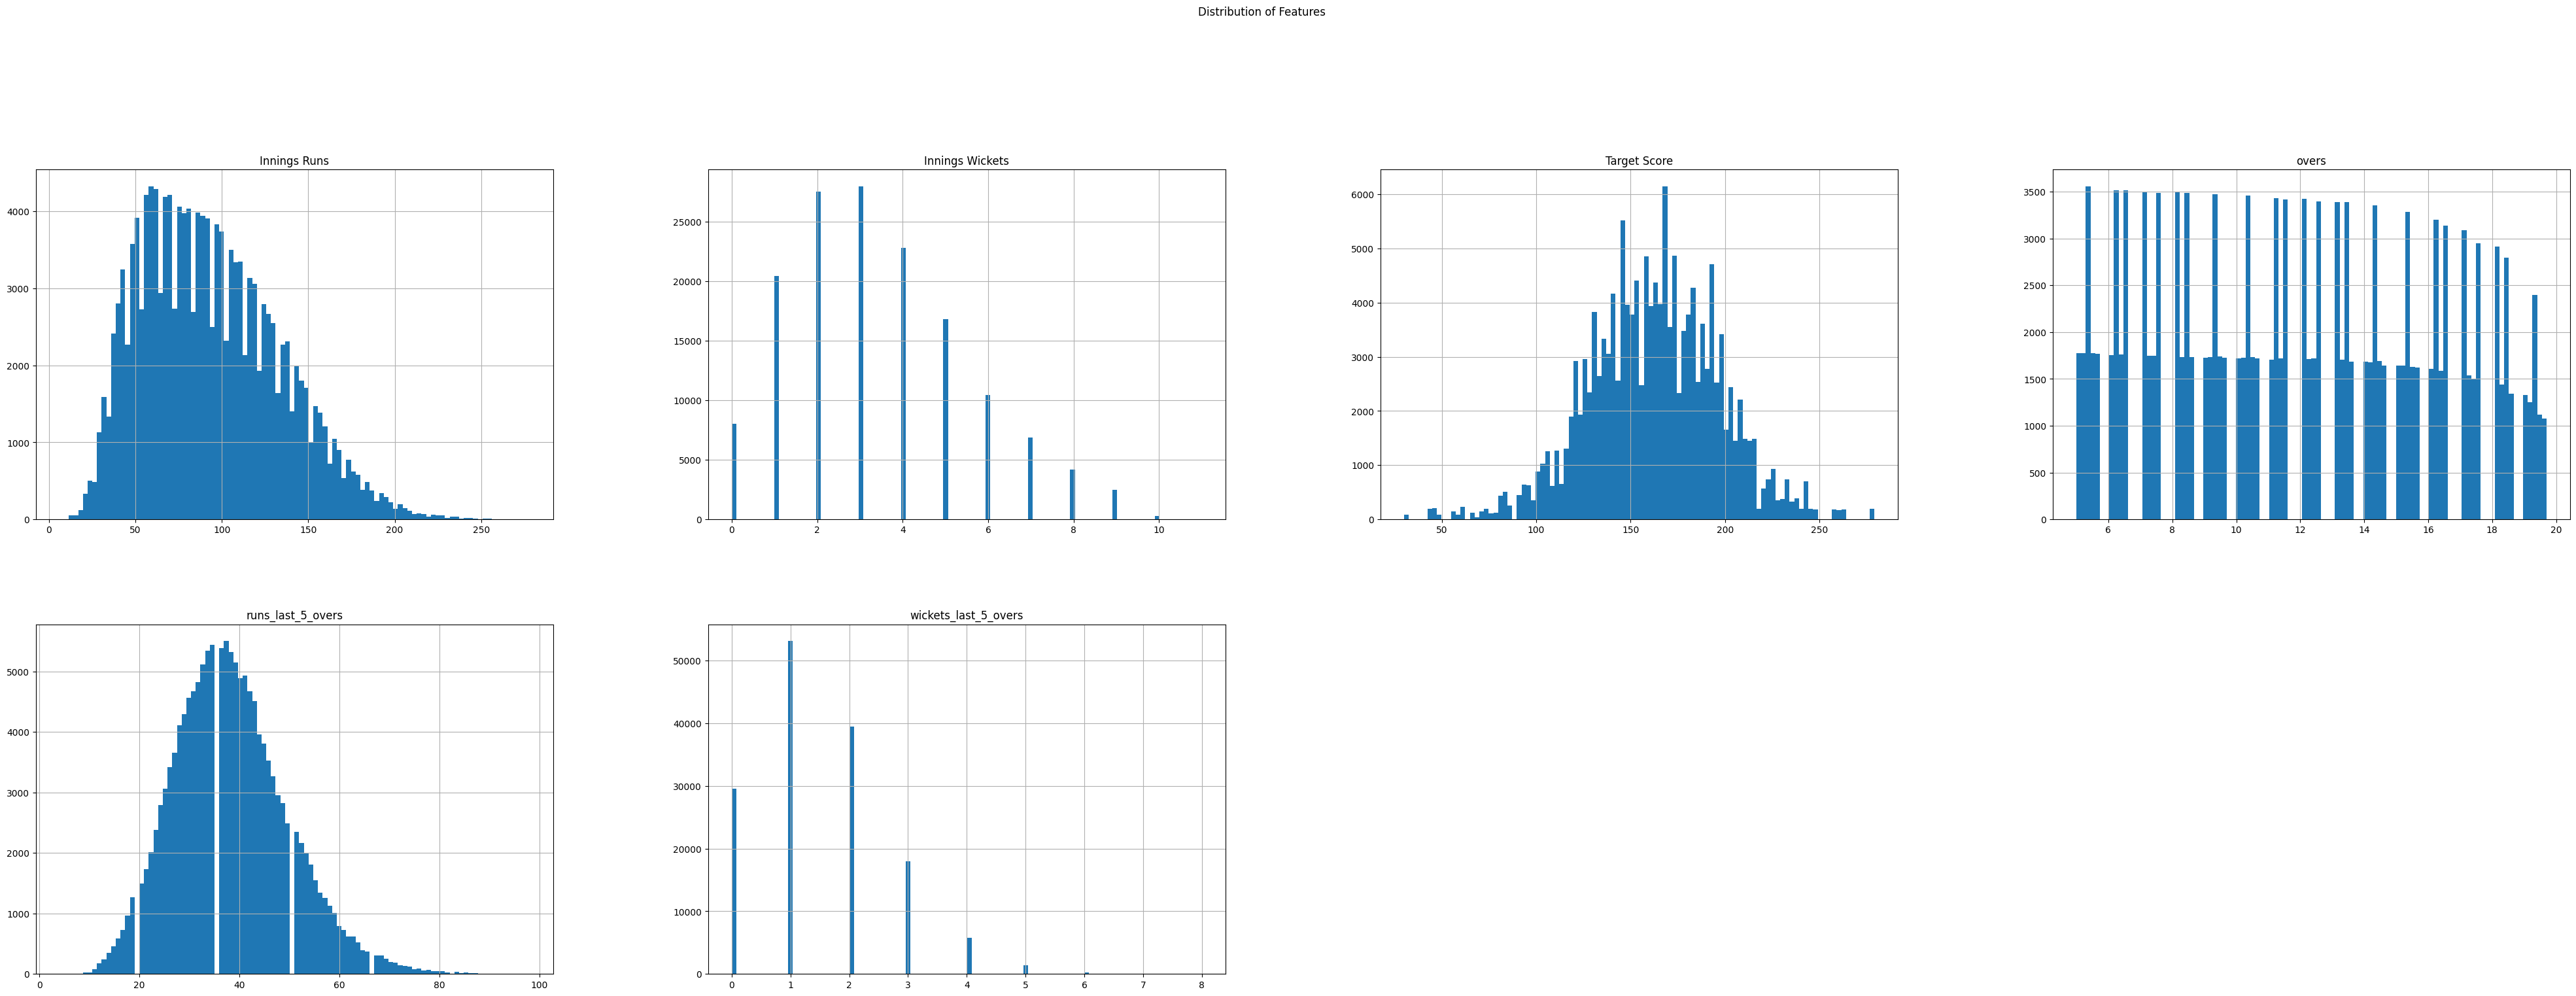

In [21]:
df.hist(bins=100,figsize=(50,25),layout=(3,4))
plt.suptitle("Distribution of Features")
plt.show()

# 5. Data Preprocessing and Encoding
The training data cannot be fed directly to the system as there are categorical as well as numerical data together. Moreover, it is efficient when the model is trained using the encoded numerical data types.

# 5.1. Performing Label Encoding
The Categorical Data features Batting Team and Bowling Team are to be converted into the Numerical data using One Hot Encoder

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
for col in ['Bat First', 'Bat Second']:
  df[col] = le.fit_transform(df[col])

df.head()

,Bat First,Bat Second,Innings Runs,Innings Wickets,Target Score,overs,runs_last_5_overs,wickets_last_5_overs
31,10,8,57,1,259,5.1,57.0,1.0
32,10,8,61,1,259,5.2,59.0,0.0
33,10,8,62,1,259,5.3,60.0,0.0
34,10,8,62,1,259,5.4,56.0,0.0
35,10,8,62,1,259,5.5,52.0,0.0


# 5.2. Performing One Hot Encoding and Column Transformation
Applying Transformations on all the final features.

In [23]:
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0, 1])], remainder='passthrough')

##5.3 Transform DataFrame and Create Column Names Array


In [24]:
array = columnTransformer.fit_transform(df)

# Convert the sparse matrix to an array
array = array.toarray()

# Create the list of column names for the DataFrame
feature_names = list(columnTransformer.named_transformers_['encoder'].get_feature_names_out(['Bat First', 'Bat Second'])) + ['Innings Runs', 'Innings Wickets', 'Target Score', 'overs', 'runs_last_5_overs', 'wickets_last_5_overs']


# 5.4. Save the Numpy Array in a new DataFrame with transformed columns
Now finally the data is ready for training, save the data into seperate DataFrame df

NOTE: After apply transformations, total number of features in Training Data are 30.

In [25]:
df = pd.DataFrame(array, columns=feature_names)

In [26]:
# Encoded Data
df.head()

,Bat First_0,Bat First_1,Bat First_2,Bat First_3,Bat First_4,Bat First_5,Bat First_6,Bat First_7,Bat First_8,Bat First_9,...,Bat Second_8,Bat Second_9,Bat Second_10,Bat Second_11,Innings Runs,Innings Wickets,Target Score,overs,runs_last_5_overs,wickets_last_5_overs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,57.0,1.0,259.0,5.1,57.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,61.0,1.0,259.0,5.2,59.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,62.0,1.0,259.0,5.3,60.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,62.0,1.0,259.0,5.4,56.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,62.0,1.0,259.0,5.5,52.0,0.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147810 entries, 0 to 147809
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Bat First_0           147810 non-null  float64
 1   Bat First_1           147810 non-null  float64
 2   Bat First_2           147810 non-null  float64
 3   Bat First_3           147810 non-null  float64
 4   Bat First_4           147810 non-null  float64
 5   Bat First_5           147810 non-null  float64
 6   Bat First_6           147810 non-null  float64
 7   Bat First_7           147810 non-null  float64
 8   Bat First_8           147810 non-null  float64
 9   Bat First_9           147810 non-null  float64
 10  Bat First_10          147810 non-null  float64
 11  Bat First_11          147810 non-null  float64
 12  Bat Second_0          147810 non-null  float64
 13  Bat Second_1          147810 non-null  float64
 14  Bat Second_2          147810 non-null  float64
 15  

# What are the likely distributions of the numeric variables?

<Figure size 700x500 with 0 Axes>

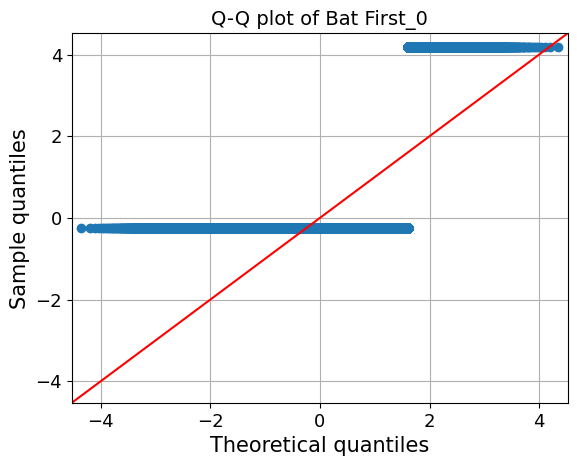

<Figure size 700x500 with 0 Axes>

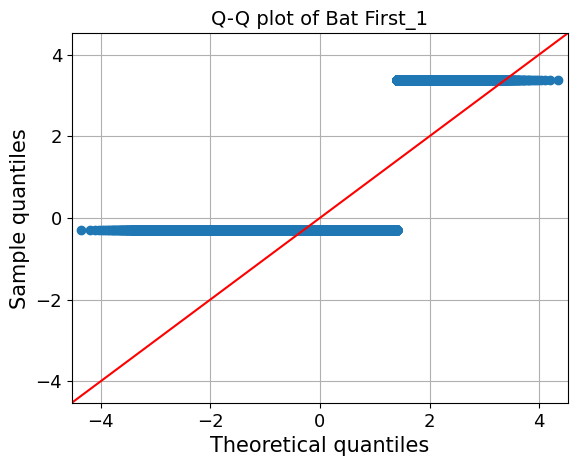

<Figure size 700x500 with 0 Axes>

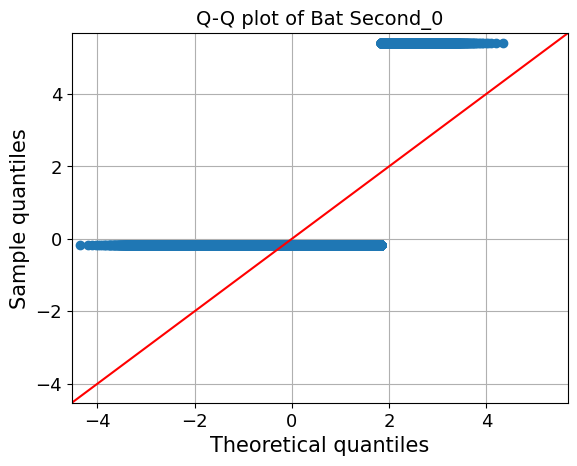

<Figure size 700x500 with 0 Axes>

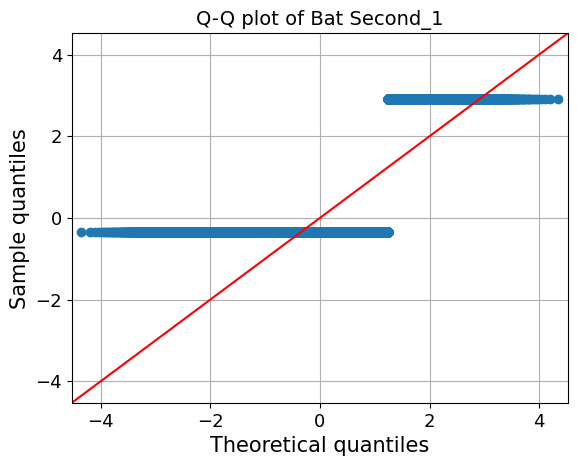

In [28]:
from re import X
#checking the distribution of numerical independent variables

from statsmodels.graphics.gofplots import qqplot

details = df[
    ['Bat First_0', 'Bat First_1', 'Bat Second_0', 'Bat Second_1']
]
for i in details.columns[:]:
    plt.figure(figsize=(7, 5))
    fig = qqplot(details[i], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(i), fontsize=14)
    plt.grid(True)
    plt.show()

In [29]:
df.head()

,Bat First_0,Bat First_1,Bat First_2,Bat First_3,Bat First_4,Bat First_5,Bat First_6,Bat First_7,Bat First_8,Bat First_9,...,Bat Second_8,Bat Second_9,Bat Second_10,Bat Second_11,Innings Runs,Innings Wickets,Target Score,overs,runs_last_5_overs,wickets_last_5_overs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,57.0,1.0,259.0,5.1,57.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,61.0,1.0,259.0,5.2,59.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,62.0,1.0,259.0,5.3,60.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,62.0,1.0,259.0,5.4,56.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,62.0,1.0,259.0,5.5,52.0,0.0


In [30]:
df.describe()

,Bat First_0,Bat First_1,Bat First_2,Bat First_3,Bat First_4,Bat First_5,Bat First_6,Bat First_7,Bat First_8,Bat First_9,...,Bat Second_8,Bat Second_9,Bat Second_10,Bat Second_11,Innings Runs,Innings Wickets,Target Score,overs,runs_last_5_overs,wickets_last_5_overs
count,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,...,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000
mean,0.053941,0.080455,0.066031,0.083073,0.124329,0.020898,0.108078,0.119484,0.102801,0.097402,...,0.077843,0.088796,0.105000,0.053521,93.453373,3.408524,162.064299,12.011658,38.229802,1.477640
std,0.225902,0.271997,0.248337,0.275993,0.329957,0.143045,0.310480,0.324359,0.303700,0.296505,...,0.267926,0.284451,0.306554,0.225072,39.833849,2.108700,34.417232,4.224943,11.368507,1.137451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,30.000000,5.000000,4.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,62.000000,2.000000,139.000000,8.400000,30.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,89.000000,3.000000,163.000000,12.100000,37.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,120.000000,5.000000,186.000000,15.500000,45.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,278.000000,11.000000,279.000000,19.700000,98.000000,8.000000


# Do the ranges of the predictor variables make sense?

In [31]:
y = df['Target Score']
x = df.drop('Target Score', axis = 1)
df_total = df

<Axes: >

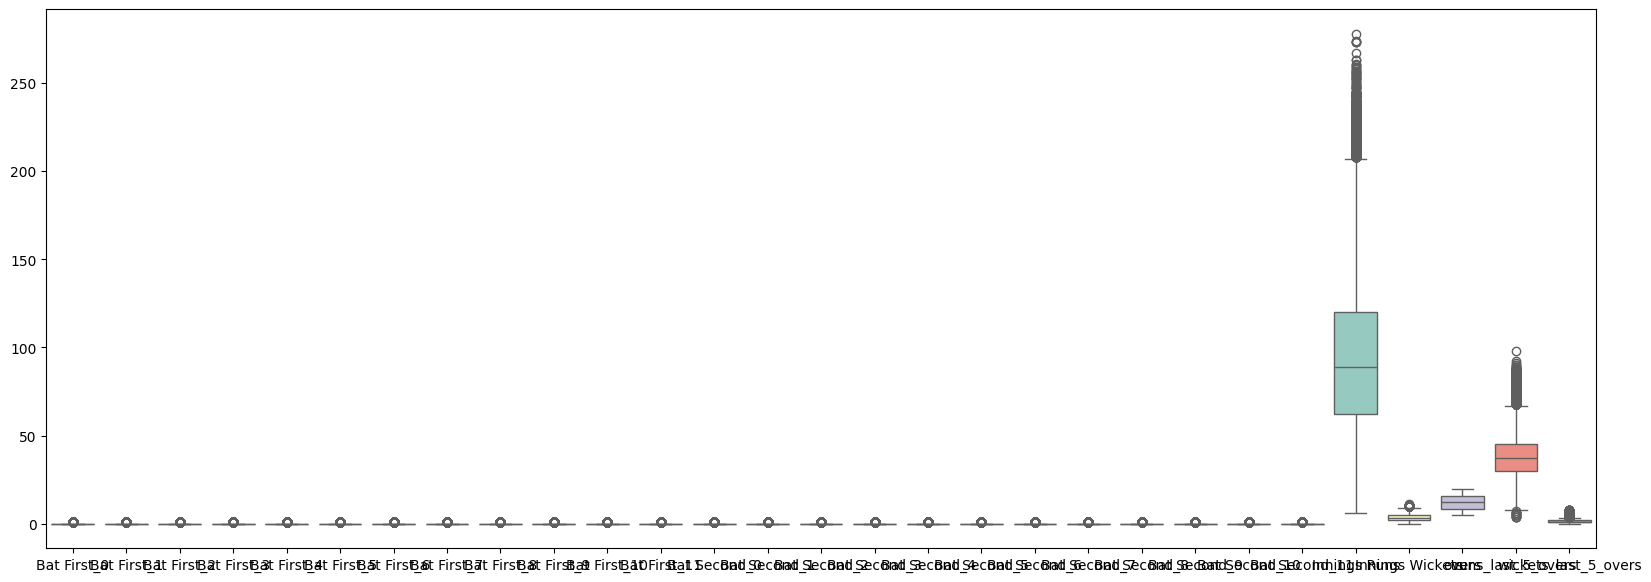

In [32]:
#Checking the range of the predictor variables
plt.figure(figsize=(20,7))
sns.boxplot(data=x, palette="Set3")

<ipython-input-33-18e077e5c16e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x[cols[i]], palette = 'Set3')
<ipython-input-33-18e077e5c16e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x[cols[i]], palette = 'Set3')
<ipython-input-33-18e077e5c16e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x[cols[i]], palette = 'Set3')
<ipython-input-33-18e077e5c16e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effec

ValueError: num must be an integer with 1 <= num <= 8, not 9

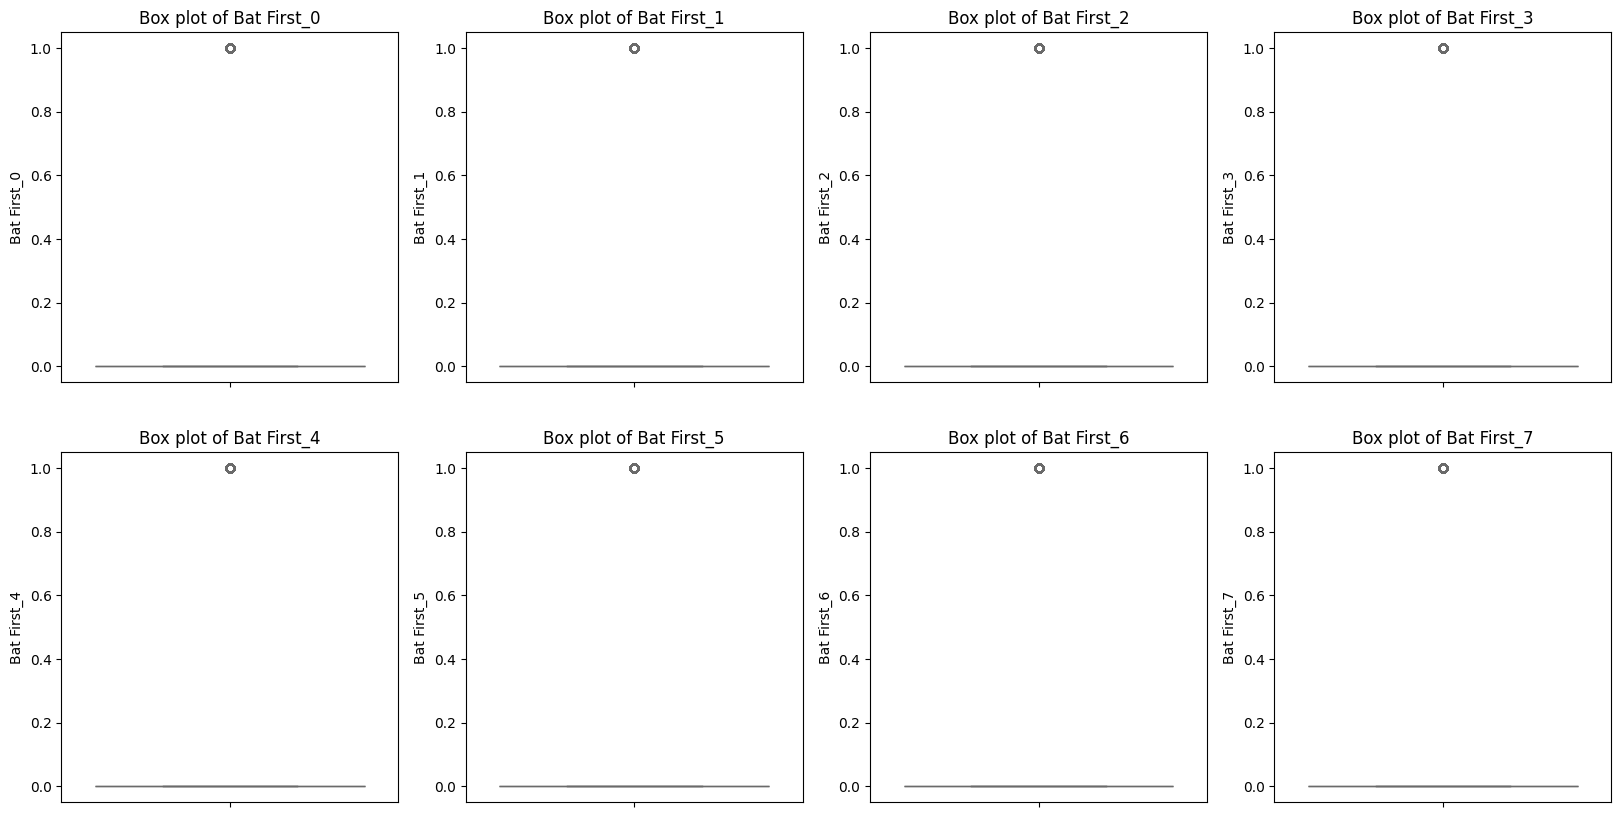

In [33]:
#Checking the Ranges of the predictor variables individually
cols = list(x.columns)
f, axs = plt.subplots(2,4,figsize=(20,10))
for i in range(len(cols)):
  plt.subplot(2,4,i+1)
  plt.title('Box plot of '+ cols[i])
  sns.boxplot(x[cols[i]], palette = 'Set3')
plt.show()

**Normalizing the dataset**

In [34]:
# list of numerical columns which require normalization
num_cols= x.columns

# Importing required library from sklearn for normalization
from sklearn import preprocessing
feature_to_scale = num_cols

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x[feature_to_scale] = min_max_scaler.fit_transform(x[feature_to_scale])

In [35]:
# checking the predictor variables after normalization
x.describe()

,Bat First_0,Bat First_1,Bat First_2,Bat First_3,Bat First_4,Bat First_5,Bat First_6,Bat First_7,Bat First_8,Bat First_9,...,Bat Second_7,Bat Second_8,Bat Second_9,Bat Second_10,Bat Second_11,Innings Runs,Innings Wickets,overs,runs_last_5_overs,wickets_last_5_overs
count,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,...,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000,147810.000000
mean,0.053941,0.080455,0.066031,0.083073,0.124329,0.020898,0.108078,0.119484,0.102801,0.097402,...,0.112949,0.077843,0.088796,0.105000,0.053521,0.321520,0.309866,0.476984,0.364147,0.184705
std,0.225902,0.271997,0.248337,0.275993,0.329957,0.143045,0.310480,0.324359,0.303700,0.296505,...,0.316532,0.267926,0.284451,0.306554,0.225072,0.146448,0.191700,0.287411,0.120942,0.142181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.205882,0.181818,0.231293,0.276596,0.125000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.305147,0.272727,0.482993,0.351064,0.125000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.419118,0.454545,0.714286,0.436170,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Box plot of predictor variables of the dataset')

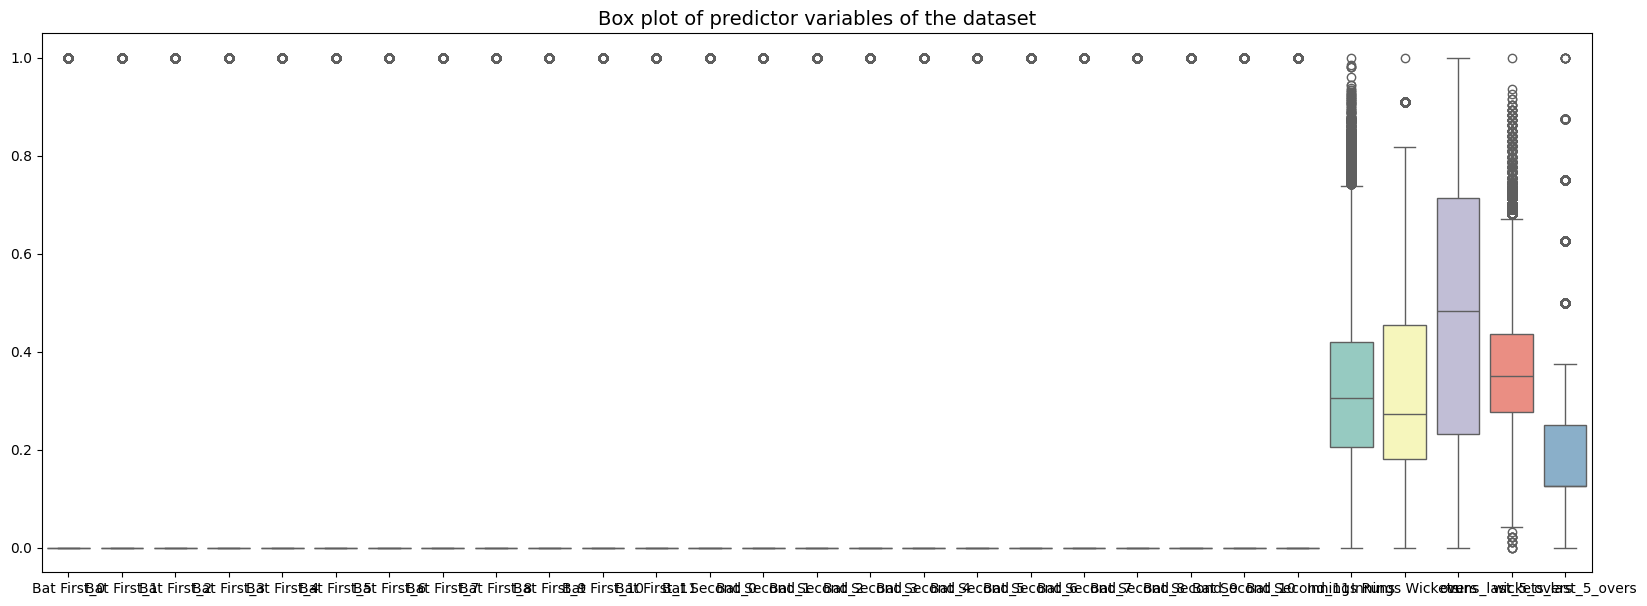

In [36]:
#Checking the Ranges of the predictor variables together after normalization
plt.figure(figsize=(20,7))
sns.boxplot(data=x, palette="Set3")
plt.title("Box plot of predictor variables of the dataset", size=14)

# Are the predictor variables independent of all other predictor variables?

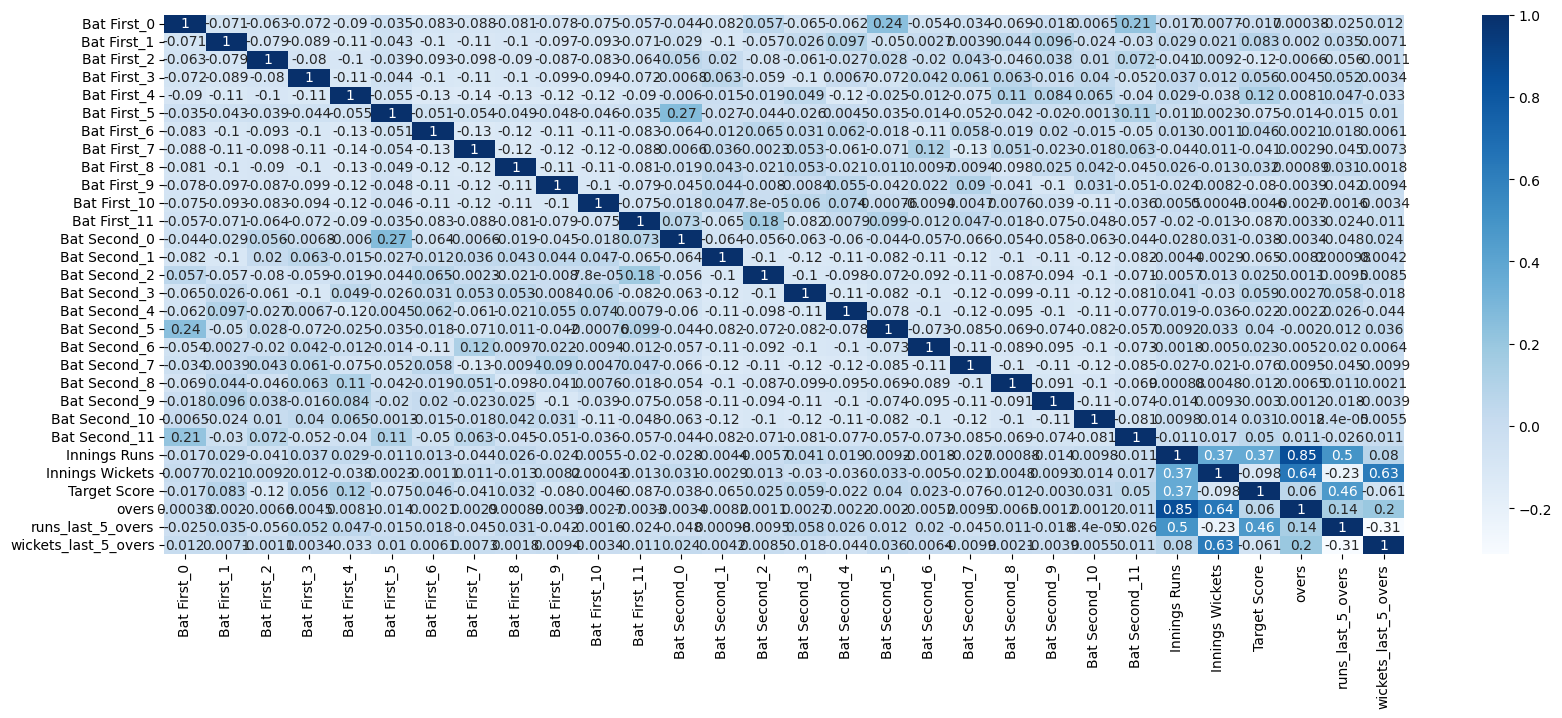

In [37]:
# Heatmap showing correlation between the attributes.

plt.figure(figsize=(20,7))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="Blues")
plt.show()

#Correlation Analysis

The heatmap depicting correlations offers a graphical depiction of how different features in the dataset relate to each other. It's essentially a color-coded matrix displaying the strength of correlation between pairs of variables.

In this heatmap, each variable is plotted on both the x and y axes, while the color of each cell within the matrix signifies the degree of correlation between the corresponding pair of variables.

This correlation heatmap serves as a valuable instrument for uncovering insights within the dataset. It aids in recognizing patterns and trends, as well as identifying variables that share robust correlations, whether positive or negative. Such insights are particularly beneficial during exploratory data analysis and can assist in pinpointing potential predictor variables for statistical modeling.

Learnings from the above correlation map:

*   It is very clear from the heatmap that most of the variables are not dependent on each other
*   Degree of collinearity is significantly less that 0.1 for most variables

# Creating a Train - Test split for our model training and predictions


In [38]:
#Spliting data into Training 80% and Test set 20%

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Training and test sets have the same data?

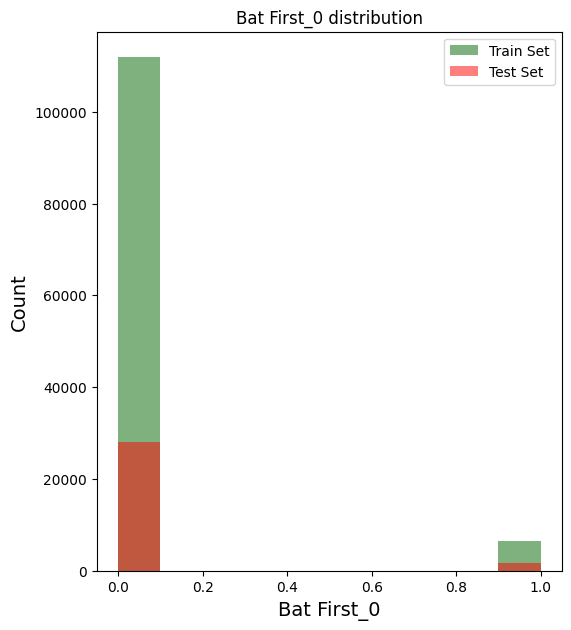

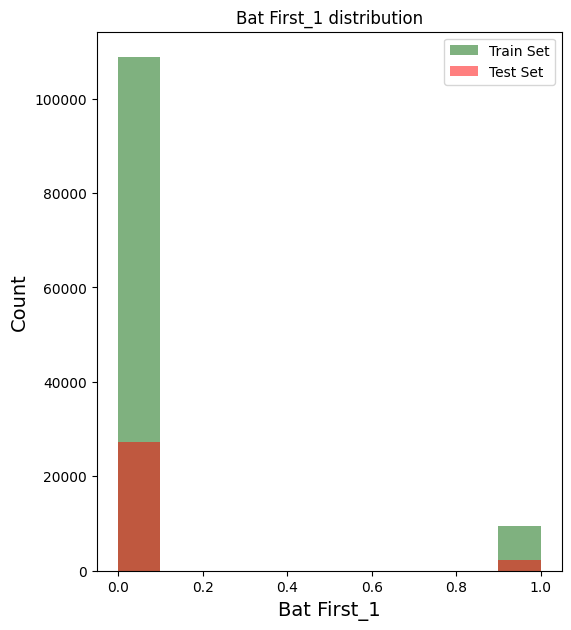

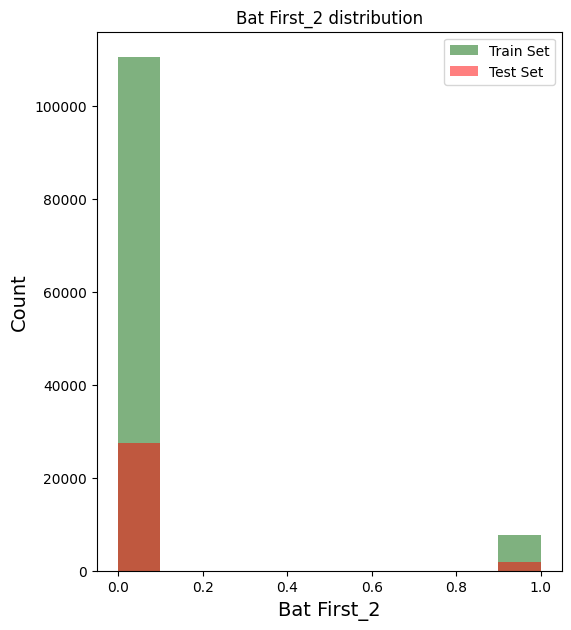

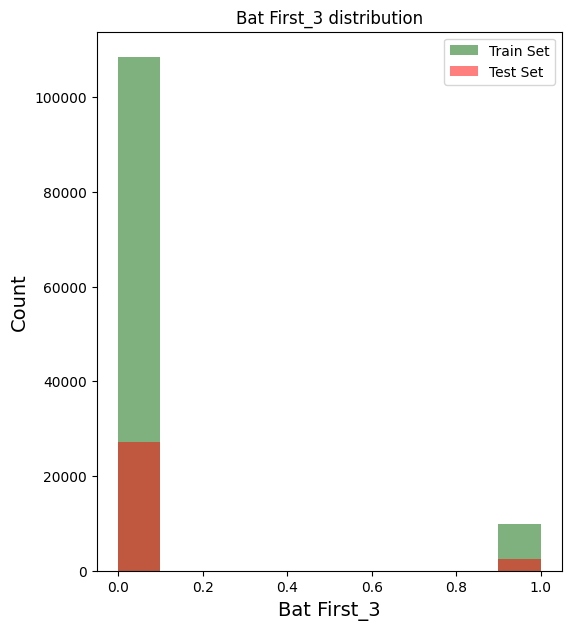

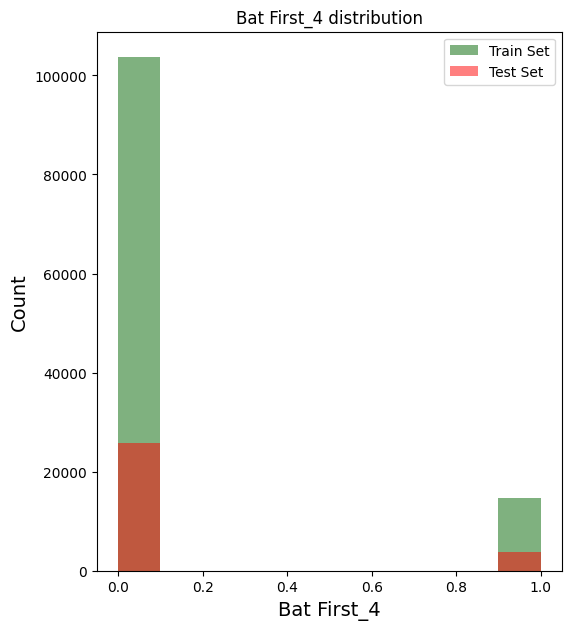

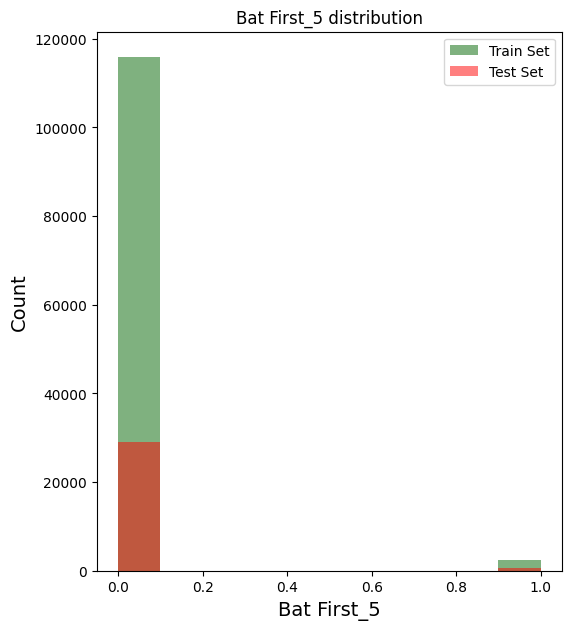

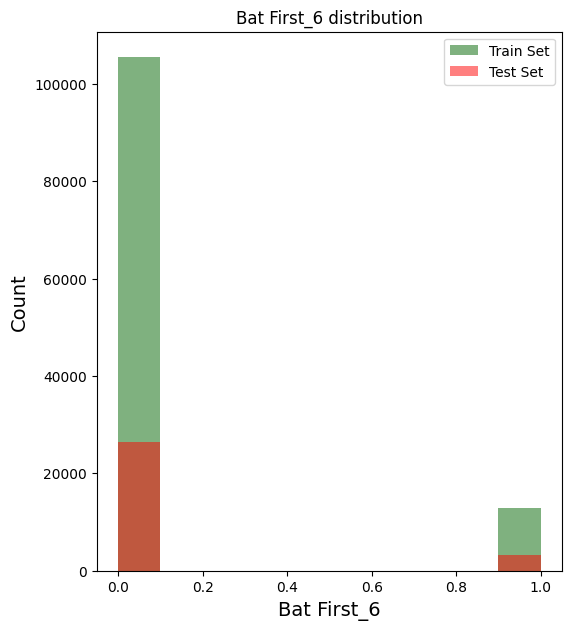

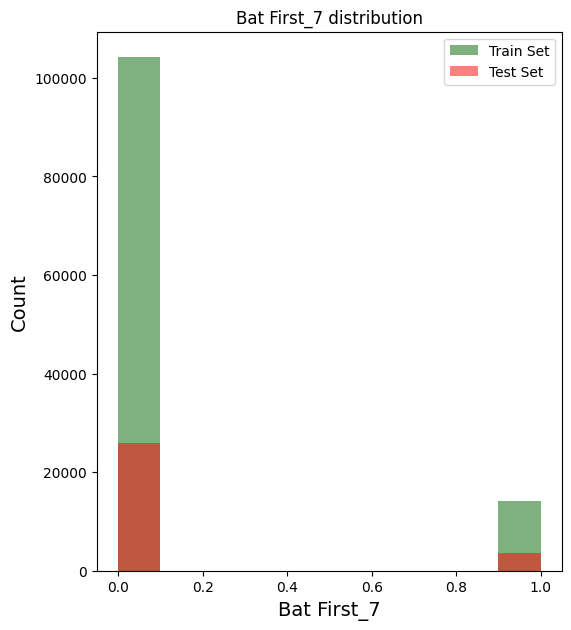

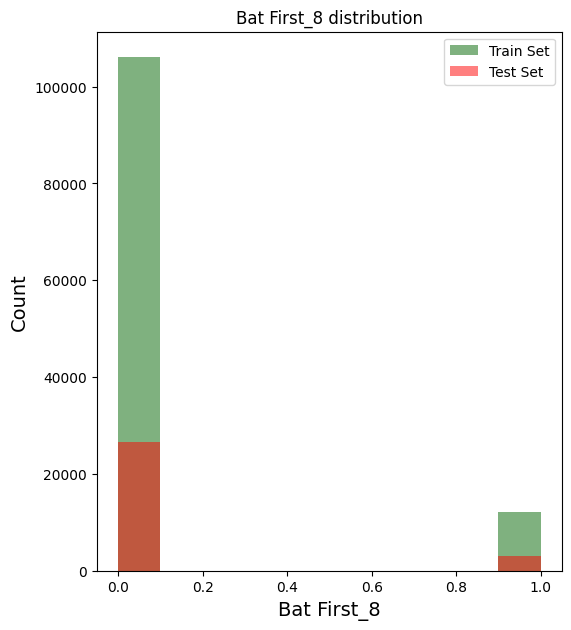

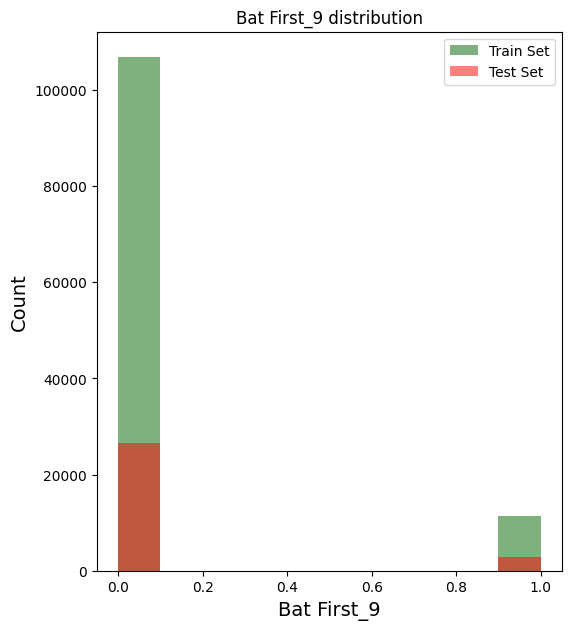

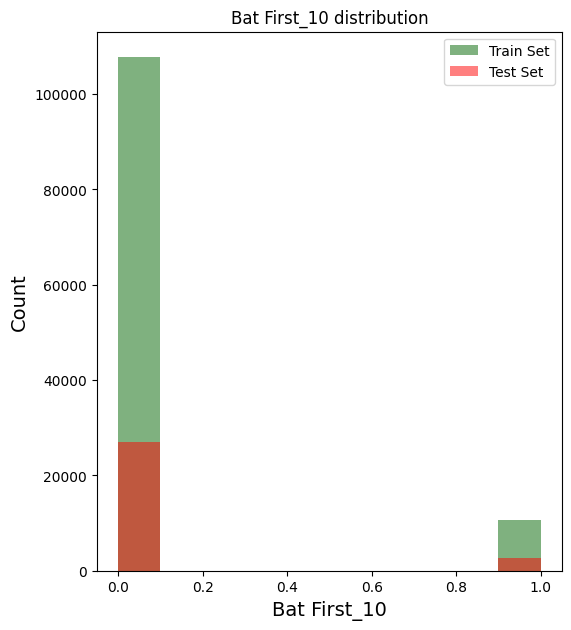

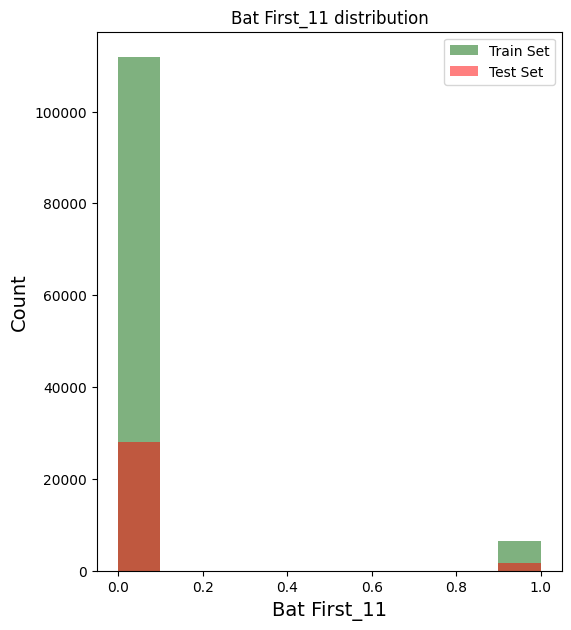

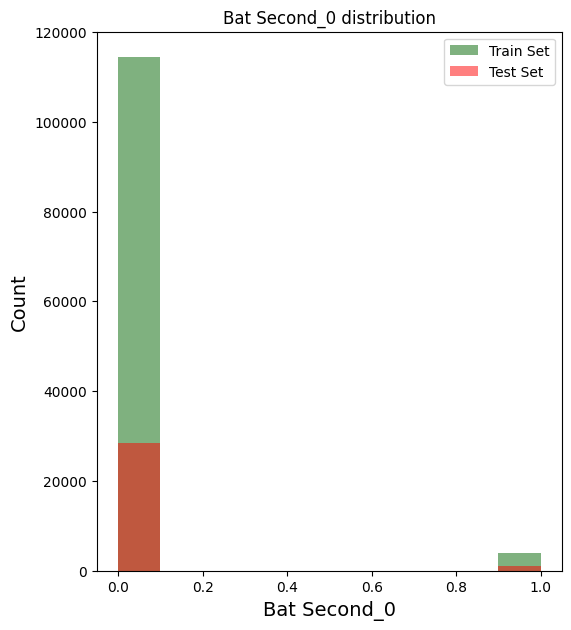

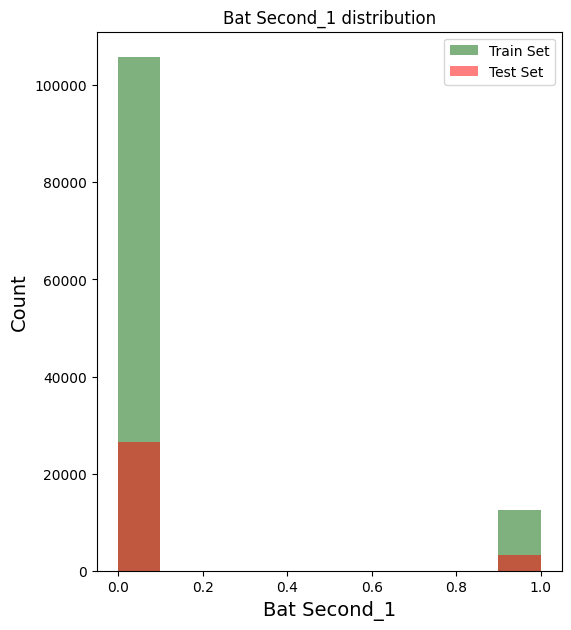

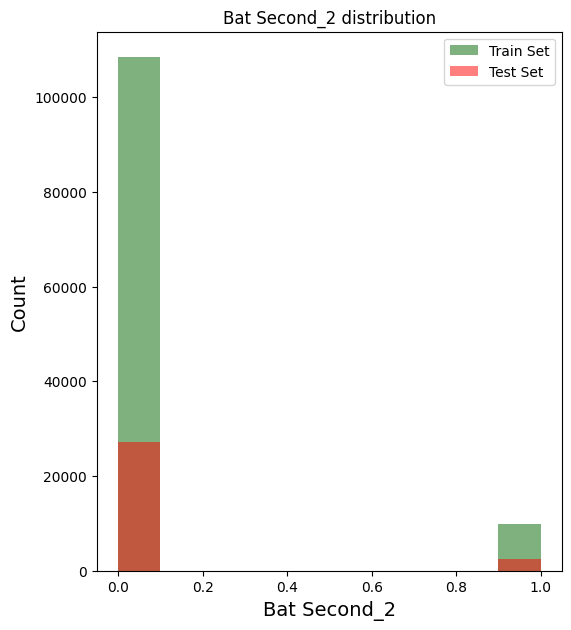

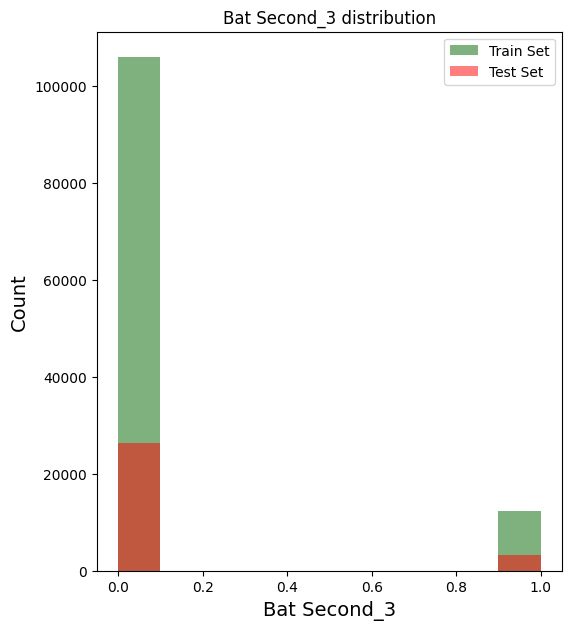

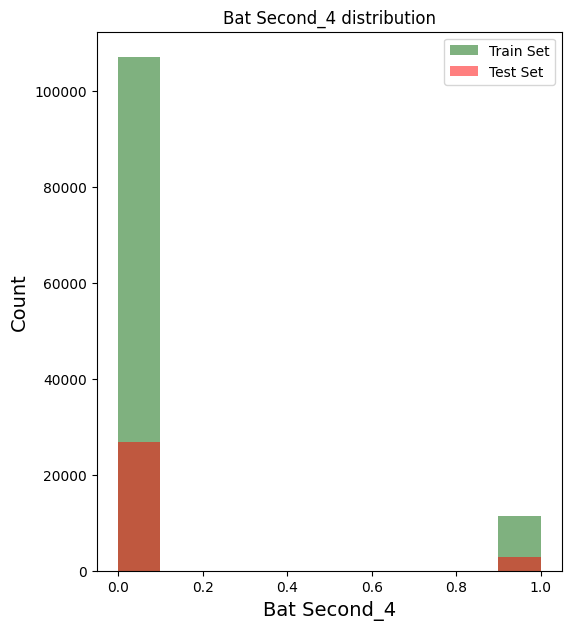

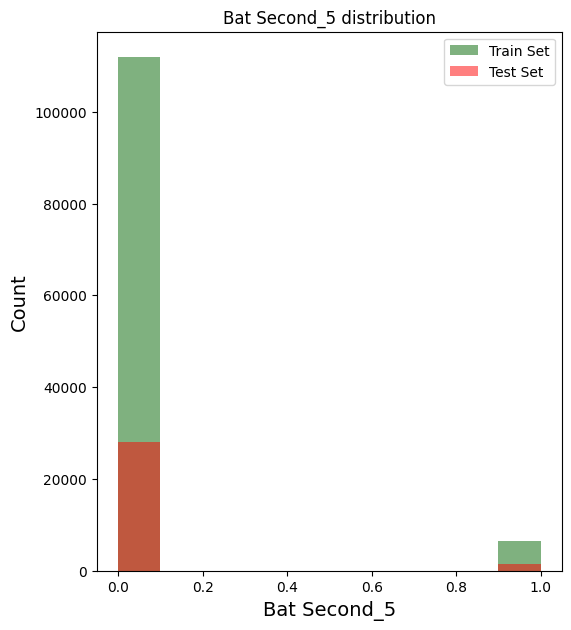

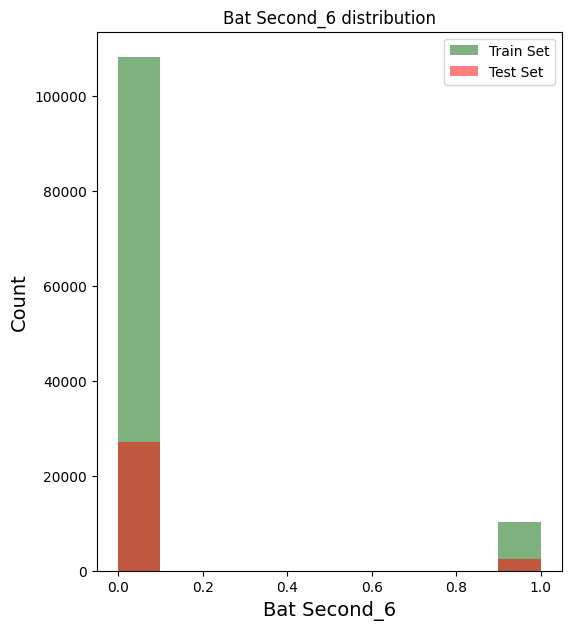

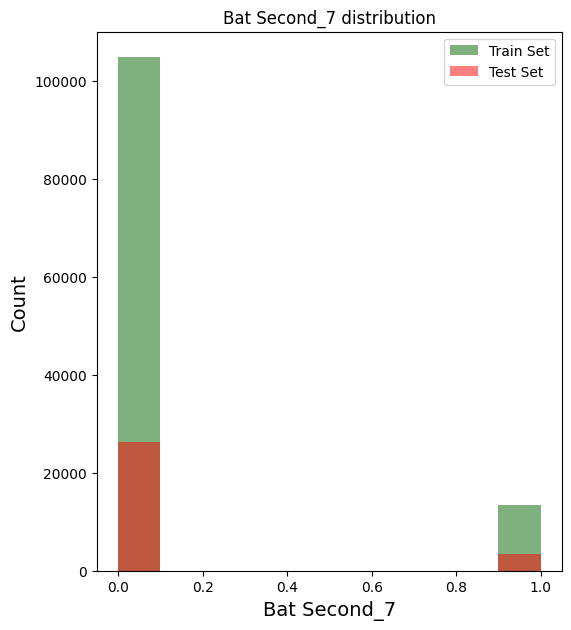

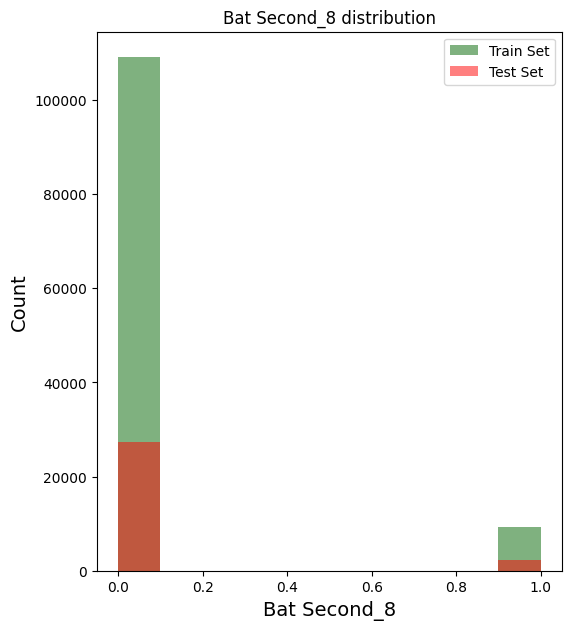

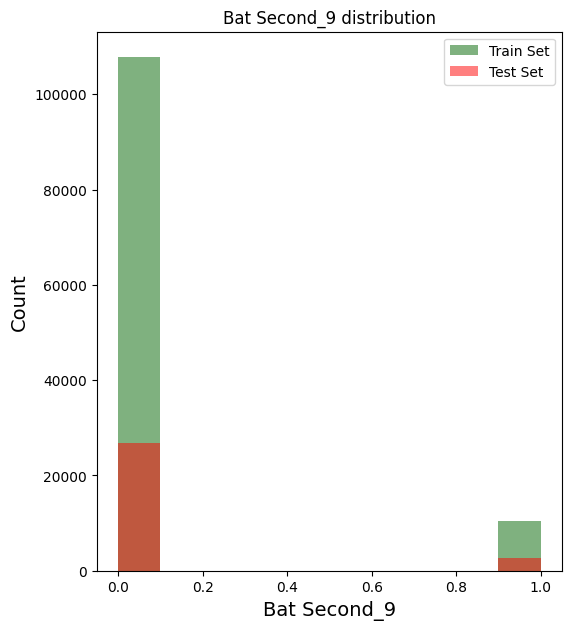

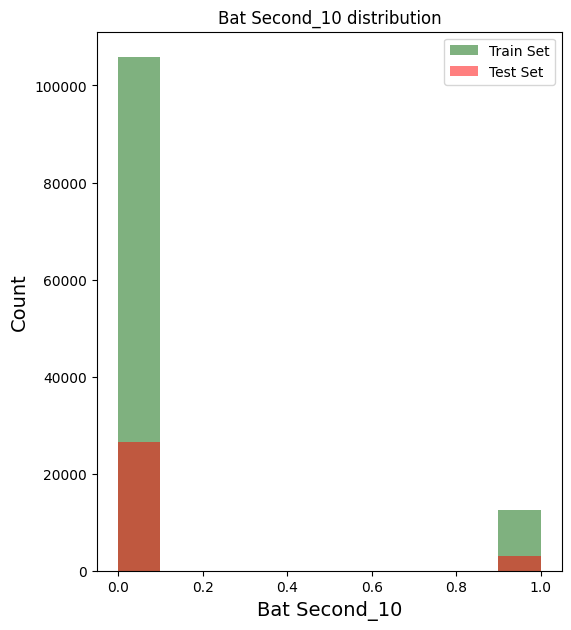

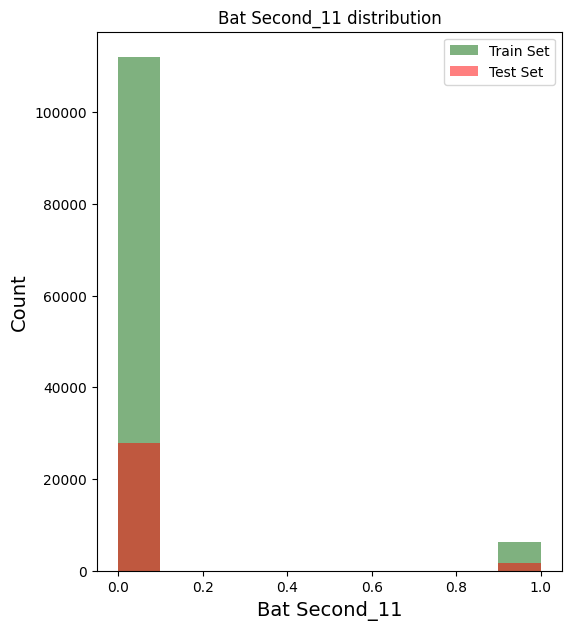

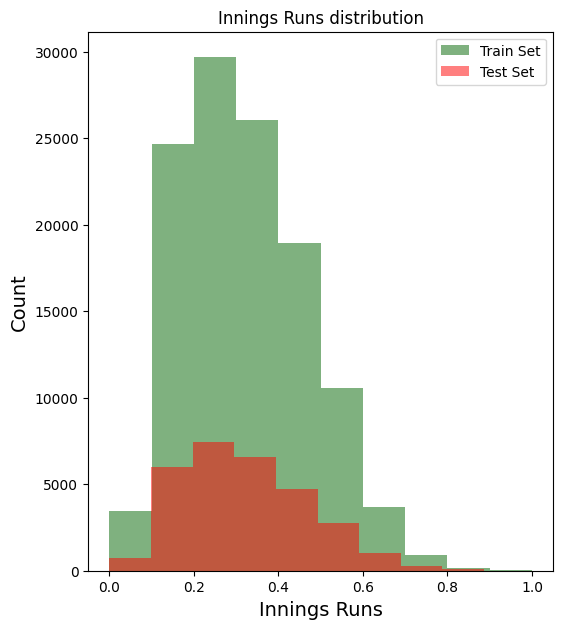

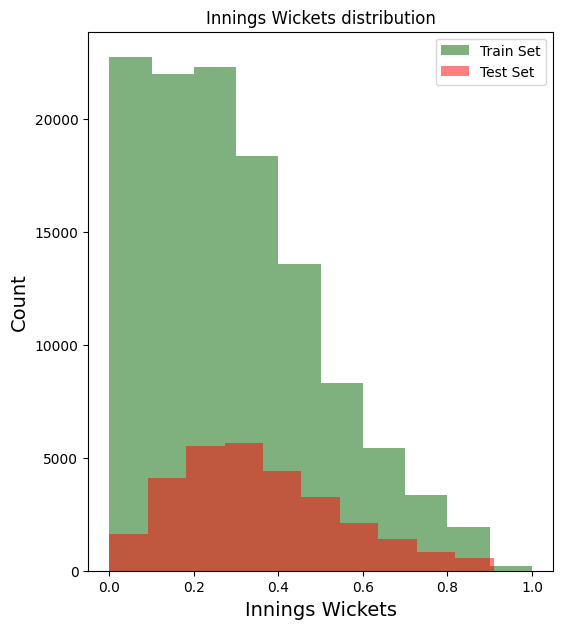

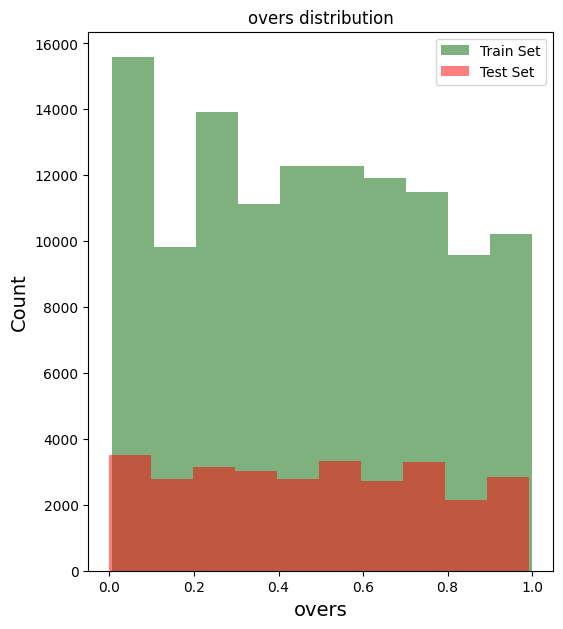

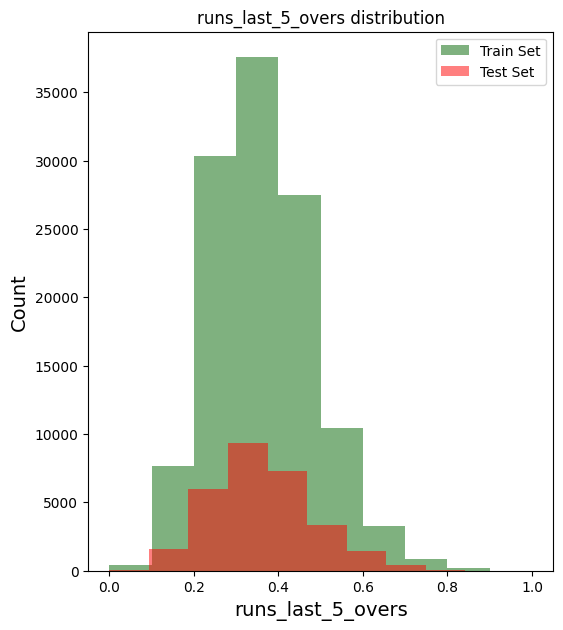

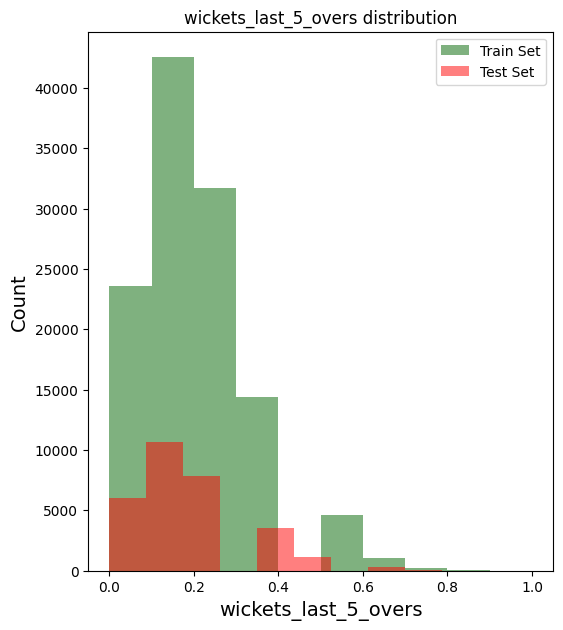

In [39]:
# Looking the data for test and training set
X_test_plot = X_test
X_train_plot = X_train

#Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(6,7))
    plt.hist(X_train_plot[c], bins=10, alpha=0.5, label="Train Set", color="darkgreen")
    plt.hist(X_test_plot[c], bins=10, alpha=0.5, label="Test Set", color ="red")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc='upper right')
    plt.title("{} distribution".format(c))
    plt.show()

# Which predictor variables are the most useful to predict a target?

1.   List item
2.   List item



**Method 1 : Using Random Forest Classifier**

Text(0.5, 1.0, 'Feature Importance ')

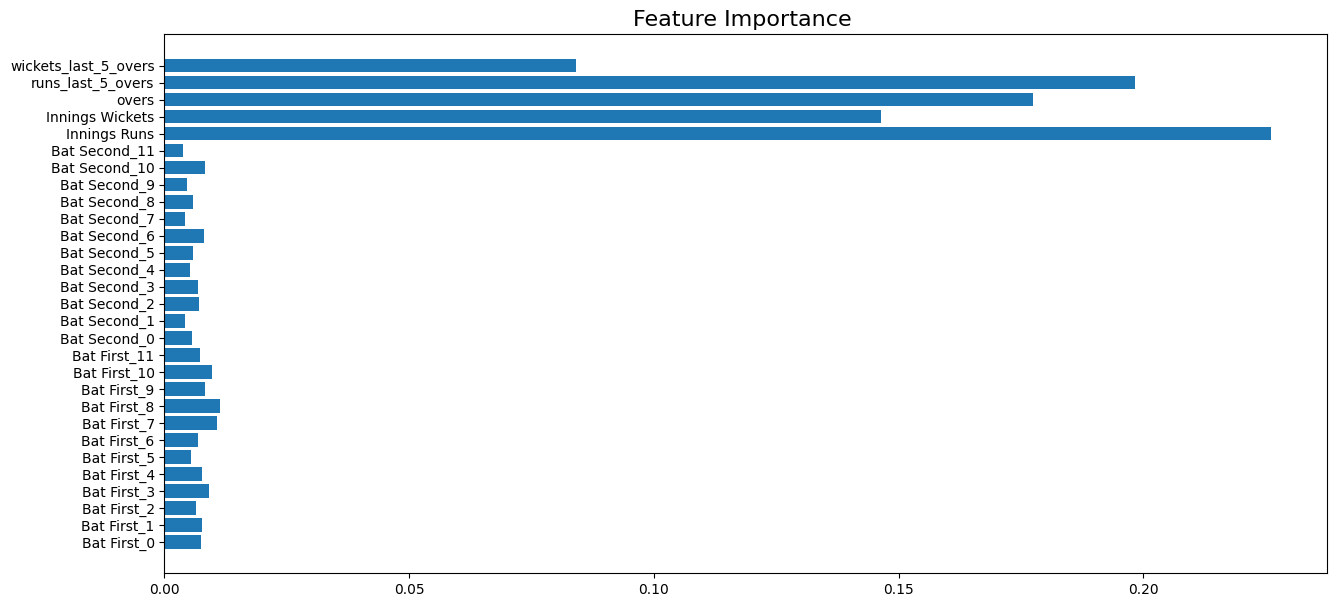

In [40]:
model_RandomForest = RandomForestClassifier()
model_RandomForest.fit(X_train, y_train)
cols=X_train.columns
plt.figure(figsize=(15, 7))
plt.barh(cols,model_RandomForest.feature_importances_)
plt.title('Feature Importance ', size=16)

**Method 2: Using Ordinary Least Squares(OLS)**

In [41]:
import statsmodels.api as sm

model_OLS = sm.OLS(y_train, X_train).fit()

model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Target Score   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     3159.
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:46:14   Log-Likelihood:            -5.5409e+05
No. Observations:              118248   AIC:                         1.108e+06
Df Residuals:                  118220   BIC:                         1.109e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Bat First_0             57.0099      0.369    154.553      0.000      56.287      57.733
Bat First_1             68.9543      0.317    217.824      0.000      68.334      69.575
Bat First_2             51.4852      0.325    158.303      0.000      50.848      52.123
Bat First_3             66.0726      0.315    209.887      0.000      65.456      66.690
Bat First_4             72.0060      0.271    265.532      0.000      71.475      72.538
Bat First_5             40.1340      0.552     72.751      0.000      39.053      41.215
Bat First_6             66.7741      0.283    235.894      0.000      66.219      67.329
Bat First_7             63.1722      0.269    234.497      0.000      62.644      63.700
Bat First_8             63.0862      0.285    221.117      0.000      62.527      63.645
Bat First_9             57.7143      0.288    200.463      0.000      57.150      58.279
Bat First_10            62.2596      0.297    209.640      0.000      61.677      62.842
Bat First_11            51.7150      0.358    144.474      0.000      51.013      52.417
Bat Second_0            63.5039      0.445    142.781      0.000      62.632      64.376
Bat Second_1            51.9419      0.282    183.978      0.000      51.389      52.495
Bat Second_2            63.3845      0.308    205.683      0.000      62.781      63.989
Bat Second_3            58.6601      0.288    203.606      0.000      58.095      59.225
Bat Second_4            55.0172      0.290    189.845      0.000      54.449      55.585
Bat Second_5            65.4969      0.372    175.861      0.000      64.767      66.227
Bat Second_6            60.9142      0.305    199.669      0.000      60.316      61.512
Bat Second_7            56.6644      0.271    208.834      0.000      56.133      57.196
Bat Second_8            53.4473      0.315    169.415      0.000      52.829      54.066
Bat Second_9            57.7809      0.296    194.988      0.000      57.200      58.362
Bat Second_10           60.2792      0.280    215.164      0.000      59.730      60.828
Bat Second_11           73.2929      0.365    200.661      0.000      72.577      74.009
Innings Runs           260.7217      1.564    166.664      0.000     257.656     263.788
Innings Wickets         28.3417      0.774     36.604      0.000      26.824      29.859
overs                 -118.2324      0.831   -142.234      0.000    -119.862    -116.603
runs_last_5_overs       16.7202      0.982     17.034      0.000      14.796      18.644
wickets_last_5_overs    -9.4257      0.779    -12.105      0.000     -10.952      -7.899
==============================================================================
Omnibus:                    15677.559   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56501.44

In [42]:
#Understanding the important features
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model_RandomForest, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=fc546b0dd30492018618e3b8b60f4884d61342378050aa8b8b975705f3854e2a
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


KeyboardInterrupt: 

# 2. Modeling (AutoML)

In [43]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpco10__d5
  JVM stdout: /tmp/tmpco10__d5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpco10__d5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_fio01m
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [44]:
# Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

h2o_df = h2o.H2OFrame(
   df
)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


This step is necessary because H2O has its own data structure that it uses for efficient machine learning operations. Converting our data to an H2O DataFrame allows us to take advantage of the automated machine learning capabilities provided by H2O's AutoML, which can help us build and evaluate machine learning models without having to manually fine-tune many parameters. It's a useful step when working with H2O for predictive modeling tasks.

In [45]:
#Retrieved the data types of columns in the H2O DataFrame."
h2o_df.types

{'Bat First_0': 'int',
 'Bat First_1': 'int',
 'Bat First_2': 'int',
 'Bat First_3': 'int',
 'Bat First_4': 'int',
 'Bat First_5': 'int',
 'Bat First_6': 'int',
 'Bat First_7': 'int',
 'Bat First_8': 'int',
 'Bat First_9': 'int',
 'Bat First_10': 'int',
 'Bat First_11': 'int',
 'Bat Second_0': 'int',
 'Bat Second_1': 'int',
 'Bat Second_2': 'int',
 'Bat Second_3': 'int',
 'Bat Second_4': 'int',
 'Bat Second_5': 'int',
 'Bat Second_6': 'int',
 'Bat Second_7': 'int',
 'Bat Second_8': 'int',
 'Bat Second_9': 'int',
 'Bat Second_10': 'int',
 'Bat Second_11': 'int',
 'Innings Runs': 'int',
 'Innings Wickets': 'int',
 'Target Score': 'int',
 'overs': 'real',
 'runs_last_5_overs': 'int',
 'wickets_last_5_overs': 'int'}

In [46]:
# Setting up the data split between training and test dataset.

split_rows = 0.80
df_train, df_test = h2o_df.split_frame([split_rows])

In [47]:
#Printed the shapes of the training and testing DataFrames
print(df_train.shape)
print(df_test.shape)

(118301, 30)
(29509, 30)


In [48]:
#Display all columns in X
X=h2o_df.columns
print(X)

['Bat First_0', 'Bat First_1', 'Bat First_2', 'Bat First_3', 'Bat First_4', 'Bat First_5', 'Bat First_6', 'Bat First_7', 'Bat First_8', 'Bat First_9', 'Bat First_10', 'Bat First_11', 'Bat Second_0', 'Bat Second_1', 'Bat Second_2', 'Bat Second_3', 'Bat Second_4', 'Bat Second_5', 'Bat Second_6', 'Bat Second_7', 'Bat Second_8', 'Bat Second_9', 'Bat Second_10', 'Bat Second_11', 'Innings Runs', 'Innings Wickets', 'Target Score', 'overs', 'runs_last_5_overs', 'wickets_last_5_overs']


In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147810 entries, 0 to 147809
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Bat First_0           147810 non-null  float64
 1   Bat First_1           147810 non-null  float64
 2   Bat First_2           147810 non-null  float64
 3   Bat First_3           147810 non-null  float64
 4   Bat First_4           147810 non-null  float64
 5   Bat First_5           147810 non-null  float64
 6   Bat First_6           147810 non-null  float64
 7   Bat First_7           147810 non-null  float64
 8   Bat First_8           147810 non-null  float64
 9   Bat First_9           147810 non-null  float64
 10  Bat First_10          147810 non-null  float64
 11  Bat First_11          147810 non-null  float64
 12  Bat Second_0          147810 non-null  float64
 13  Bat Second_1          147810 non-null  float64
 14  Bat Second_2          147810 non-null  float64
 15  

In [50]:
# Set target and predictor variables
y = 'Target Score'
X.remove(y)  # removing the target variable from our predictors data
print(X)

['Bat First_0', 'Bat First_1', 'Bat First_2', 'Bat First_3', 'Bat First_4', 'Bat First_5', 'Bat First_6', 'Bat First_7', 'Bat First_8', 'Bat First_9', 'Bat First_10', 'Bat First_11', 'Bat Second_0', 'Bat Second_1', 'Bat Second_2', 'Bat Second_3', 'Bat Second_4', 'Bat Second_5', 'Bat Second_6', 'Bat Second_7', 'Bat Second_8', 'Bat Second_9', 'Bat Second_10', 'Bat Second_11', 'Innings Runs', 'Innings Wickets', 'overs', 'runs_last_5_overs', 'wickets_last_5_overs']


In [51]:
# Setting up maximum runtime for the AutoML

run_time = 222

auto_ml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [52]:
#pass the data through H20AutoML
auto_ml.train(x=X,y=y,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,blending
Number of base models (used / total),3/8
# GBM base models (used / total),0/4
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0
Metalearner fold_column,None


# Interpreting the above results


#Model Summary:
Our model is a Stacked Ensemble trained using H2O AutoML.
It's built on a variety of base models, including XGBoost, Random Forest, and Generalized Linear Models (GLM).
The ensemble strategy blends predictions from these base models to improve overall performance.
ModelMetricsRegressionGLM (Train Data):

#The model's performance on the training data:

1.Mean Squared Error (MSE): 72.58, indicating the average squared deviation of predictions from actual values.
Root Mean Squared Error (RMSE): 8.52, which is the square root of MSE, representing the typical magnitude of errors.
2.Mean Absolute Error (MAE): 6.14, showing the average absolute deviation of predictions from actual values.
Root Mean Squared Logarithmic Error (RMSLE): 0.0607, indicating the average deviation of the logarithm of predictions from the logarithm of actual values.
3.Mean Residual Deviance: 72.58, representing the average residual deviance of predictions from actual values.
R-squared (R^2): 0.939, indicating the proportion of variance in the target variable explained by the model.
ModelMetricsRegressionGLM (Validation Data):

#The model's performance on the validation data:

MSE: 236.34, indicating higher error compared to the training data.
RMSE: 15.37, showing the typical magnitude of errors on the validation data.
MAE: 10.60, representing the average absolute deviation of predictions from actual values on the validation data.
RMSLE: 0.1111, indicating the average deviation of the logarithm of predictions from the logarithm of actual values on the validation data.
Mean Residual Deviance: 236.34, representing the average residual deviance of predictions from actual values on the validation data.
R-squared (R^2): 0.800, indicating the proportion of variance in the target variable explained by the model on the validation data.
Analysis:
The model demonstrates good performance on the training data with relatively low error metrics (MSE, RMSE, MAE).
However, there is a significant increase in error metrics when evaluated on the validation data, indicating potential overfitting.
The R-squared value suggests that the model explains approximately 94% of the variance in the target variable on the training data and 80% on the validation data.
Further analysis, such as feature importance and diagnostics, is recommended to understand the model's behavior and identify potential areas for improvement.






Overall, while the model performs well on the training data, caution should be exercised when interpreting its performance on unseen data, as indicated by the higher error metrics on the validation data. Further refinement and evaluation may be necessary to improve the model's generalization capability.

In [53]:
print(
    auto_ml.leaderboard
)

model_id                                                    rmse      mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240402_235445     15.4798  239.625  10.7396  0.109683                   239.625
StackedEnsemble_BestOfFamily_2_AutoML_1_20240402_235445  15.5054  240.419  10.7341  0.109864                   240.419
StackedEnsemble_BestOfFamily_3_AutoML_1_20240402_235445  15.5054  240.419  10.7341  0.109864                   240.419
StackedEnsemble_BestOfFamily_1_AutoML_1_20240402_235445  16.2468  263.957  11.473   0.114512                   263.957
XGBoost_1_AutoML_1_20240402_235445                       16.2767  264.933  11.4704  0.113727                   264.933
DRF_1_AutoML_1_20240402_235445                           17.6033  309.878  12.2778  0.125963                   309.878
XGBoost_2_AutoML_1_20240402_235445                       17.7993  316.814  12.8787  0.125288                   316.814
GBM_4_AutoML_1_20240402_235445                  

In [54]:
#Created a dictionary mapping model IDs to their corresponding indices based on their position in the AutoML leaderboard DataFrame
model_index = 0
glm_index = 0
glm_model = ""
auto_ml_leaderboard_df = auto_ml.leaderboard.as_data_frame()
models_dict = {}
for m in auto_ml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in auto_ml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'StackedEnsemble_AllModels_1_AutoML_1_20240402_235445': 0,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20240402_235445': 1,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20240402_235445': 2,
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20240402_235445': 3,
 'XGBoost_1_AutoML_1_20240402_235445': 4,
 'GLM_1_AutoML_1_20240402_235445': 12}

In [55]:
print(model_index)
best_model = h2o.get_model(auto_ml.leaderboard[model_index, "model_id"])

4


In [56]:
best_model.algo

'xgboost'

In [57]:
%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

<ipython-input-57-57ae2e92d3fa>:6: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


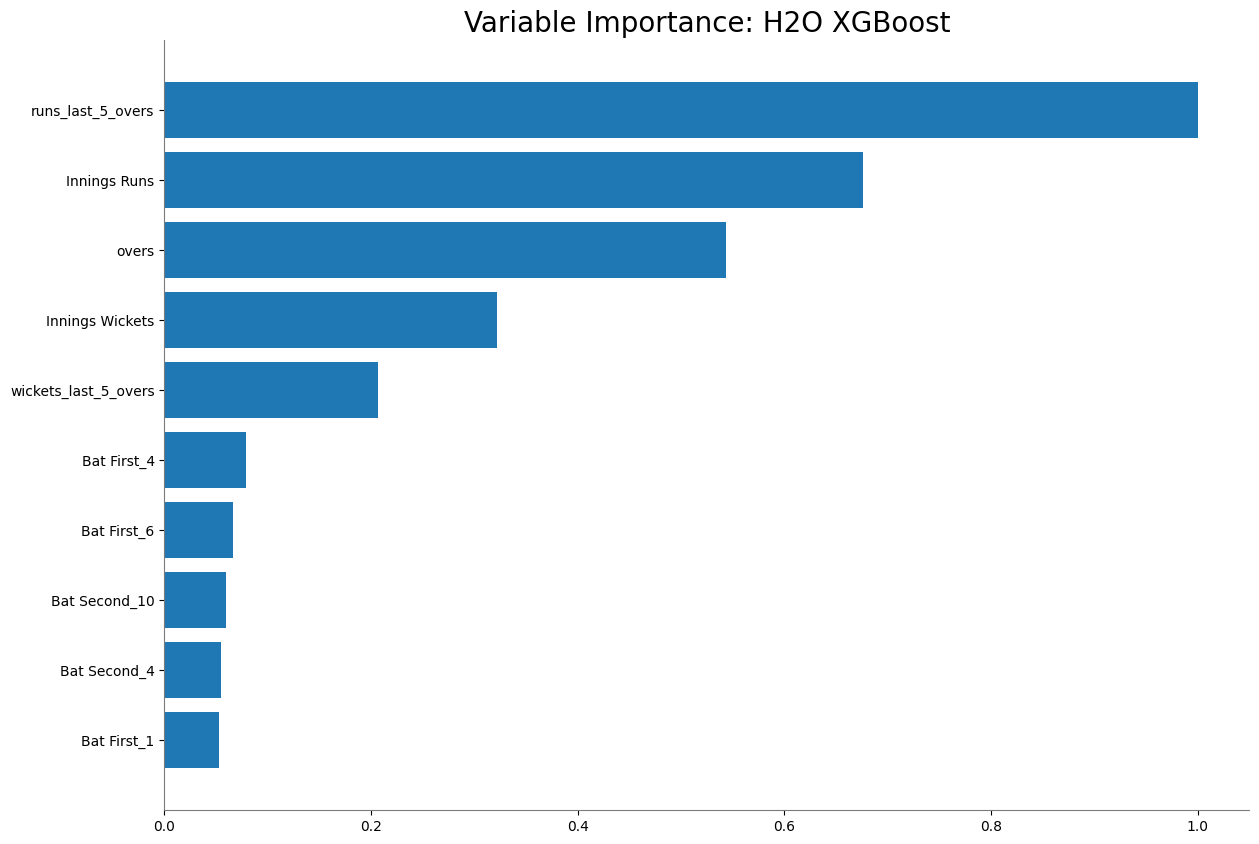

<Figure size 640x480 with 0 Axes>

In [58]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-59-7338a7081ba0>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


12
glm


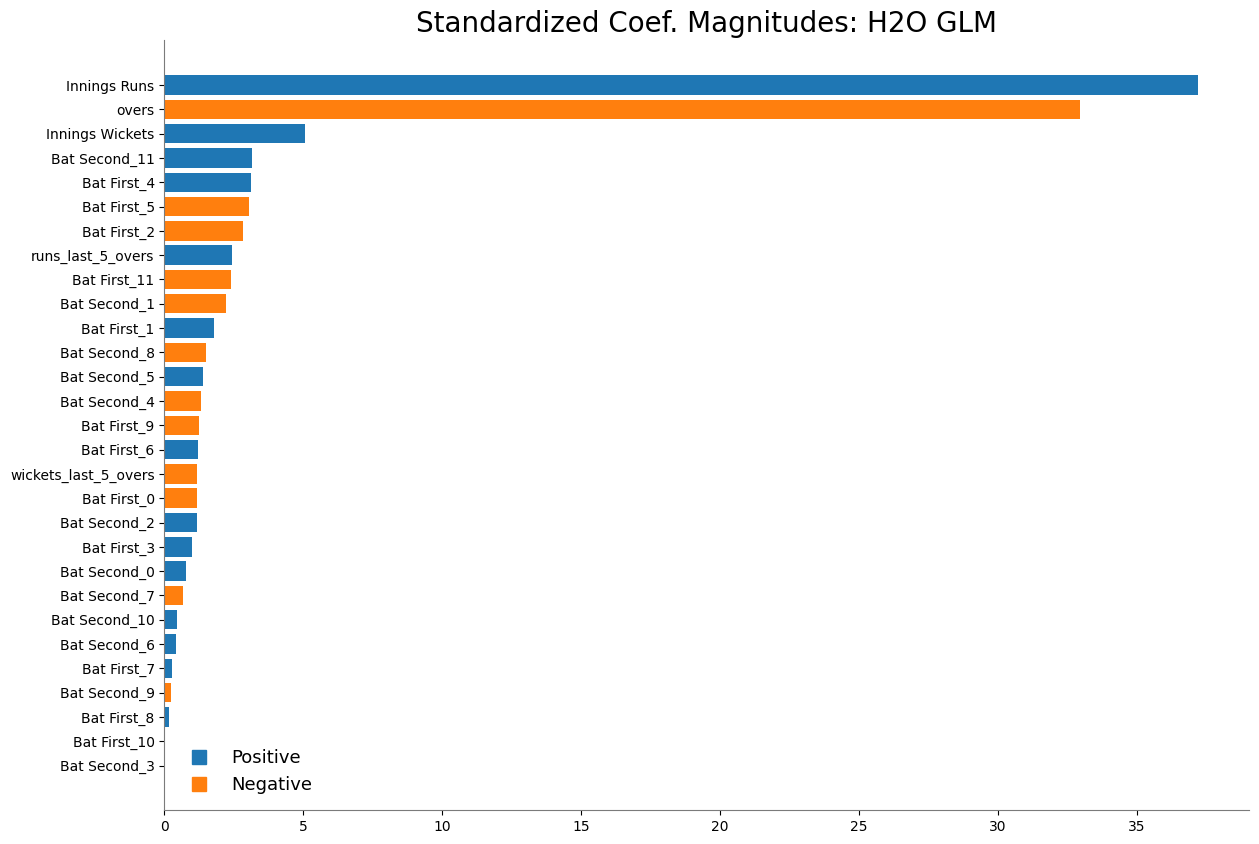

In [59]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(auto_ml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

In [60]:
print(best_model.rmse(train=True))

8.327093091330728


RMSE is a common metric used to evaluate the performance of regression models. It measures the average magnitude of errors between the predicted values and the actual target values. A lower RMSE indicates a better fit of the model to the training data.

In [61]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [62]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 270.97486958177393,
 'rmse': 16.46131433336275,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None,
 'aic': 'NaN'}

In [63]:
predictions = best_model.predict(df_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [64]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

          predict
0      245.890457
1      260.231171
2      251.140549
3      253.972839
4      254.402344
...           ...
29504  179.449921
29505  180.145065
29506  184.104279
29507  179.571808
29508  178.013580

[29509 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [65]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,Target Score
0,259
1,259
2,259
3,259
4,259
...,...
29504,181
29505,181
29506,181
29507,181


# 3. Model Interpretability

We will run SHAP analysis on automl model, a linear model and a tree based model, interpret the SHAP values and compare them with the other model interpretability methods.

**a. Automl with SHAP**

In [66]:
data = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [67]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

This code splits the H2OFrame data into training and testing sets using the split_frame method. The seed parameter ensures reproducibility, and the destination_frames parameter assigns names to the resulting training and testing sets, stored as separate H2OFrames ("train.hex" and "test.hex").

In [68]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

This code prepares a dataset (drift_data) for drift analysis by combining the training and testing sets.


In [69]:
drift_data["is_train"].table()

is_train,Count
0,36862
1,110948


In [70]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147810 entries, 0 to 147809
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Bat First_0           147810 non-null  float64
 1   Bat First_1           147810 non-null  float64
 2   Bat First_2           147810 non-null  float64
 3   Bat First_3           147810 non-null  float64
 4   Bat First_4           147810 non-null  float64
 5   Bat First_5           147810 non-null  float64
 6   Bat First_6           147810 non-null  float64
 7   Bat First_7           147810 non-null  float64
 8   Bat First_8           147810 non-null  float64
 9   Bat First_9           147810 non-null  float64
 10  Bat First_10          147810 non-null  float64
 11  Bat First_11          147810 non-null  float64
 12  Bat Second_0          147810 non-null  float64
 13  Bat Second_1          147810 non-null  float64
 14  Bat Second_2          147810 non-null  float64
 15  

In [71]:
x = list(set(train.col_names) - set(["Target Score"]))

This code defines a list x containing the column names of the train H2OFrame, excluding the column named "Target Score." It uses the set operation to achieve this, extracting all columns except the one specified. The resulting list x represents the predictor variables used for model training, excluding the target variable "HeartDisese."

In [72]:
new_auto_ml = H2OAutoML(max_runtime_secs=222, seed=1)

In [73]:
new_auto_ml.train(x=x, y="Target Score", training_frame=train)

AutoML progress: |
23:59:54.644: _train param, Dropping bad and constant columns: [is_train]

███████████████████
00:01:01.760: _train param, Dropping bad and constant columns: [is_train]

█
00:01:04.169: _train param, Dropping bad and constant columns: [is_train]

████████
00:01:33.327: _train param, Dropping unused columns: [is_train]

██
00:01:39.29: _train param, Dropping bad and constant columns: [is_train]

█████
00:01:58.107: _train param, Dropping bad and constant columns: [is_train]

█████
00:02:16.481: _train param, Dropping bad and constant columns: [is_train]

█████
00:02:34.445: _train param, Dropping bad and constant columns: [is_train]

█████
00:02:52.332: _train param, Dropping bad and constant columns: [is_train]

█████
00:03:10.265: _train param, Dropping unused columns: [is_train]

██
00:03:16.347: _train param, Dropping unused columns: [is_train]

██
00:03:22.511: _train param, Dropping bad and constant columns: [is_train]


00:03:25.318: _train param, Dropping bad 

key,value
Stacking strategy,blending
Number of base models (used / total),3/12
# GBM base models (used / total),0/5
# XGBoost base models (used / total),2/3
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),0/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0


Summary:

The analysis is based on a Stacked Ensemble model, which combines various algorithms such as GBM, XGBoost, and DRF to improve predictive performance. This ensemble model was trained and validated on a dataset with a binary response column, indicating a binary classification task.

Model Performance Metrics:

- **Training Data:**
  - Mean Squared Error (MSE): 60.56
  - Root Mean Squared Error (RMSE): 7.78
  - Mean Absolute Error (MAE): 5.56
  - R-squared (R^2): 0.95
  - Mean Residual Deviance: 60.56
  - AIC: 68925.40

- **Validation Data:**
  - Mean Squared Error (MSE): 242.30
  - Root Mean Squared Error (RMSE): 15.57
  - Mean Absolute Error (MAE): 10.63
  - R-squared (R^2): 0.80
  - Mean Residual Deviance: 242.30
  - AIC: 91735.31

These metrics provide insights into the model's accuracy and generalization performance. Lower values of MSE, RMSE, and MAE indicate better predictive accuracy, while a higher R-squared value signifies a better fit of the model to the data.

Model Selection:

Out of the 6 base models, the ensemble selected 4 for final stacking, suggesting their significant contribution to predictive power.

Metalearner (GLM):

The GLM metalearner was employed to blend the predictions of the base models. Being a linear model, the coefficients of the GLM can offer insights into each base model's contribution to the ensemble's predictions.

In [74]:
best_model = new_auto_ml.leader
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 233.70582797274847
RMSE: 15.287440203407124
MAE: 10.434807767140661
RMSLE: 0.10934728767993059
Mean Residual Deviance: 233.70582797274847
R^2: 0.8050056138329426
Null degrees of freedom: 36861
Residual degrees of freedom: 36858
Null deviance: 44180065.4934511
Residual deviance: 8614864.230731454
AIC: 305667.50132892985

#SHAP

In [75]:
shap.initjs()

In [76]:
# Help function
class H2OProbWrapper:
    def __init__(self, h2o_model, feature_names):
        self.h2o_model = h2o_model
        self.feature_names = feature_names

    def predict_binary_prob(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        self.dataframe= pd.DataFrame(X, columns=self.feature_names)
        self.predictions = self.h2o_model.predict(h2o.H2OFrame(self.dataframe)).as_data_frame().values
        return self.predictions.astype('float64')[:,-1] #probability of True class

The H2OProbWrapper class is designed to wrap an H2O binary classification model, providing a convenient method, predict_binary_prob, for predicting probabilities of the positive class. It takes input data X, ensures it's formatted correctly, creates a DataFrame, and uses the wrapped H2O model to predict probabilities. The resulting probabilities for the positive class are returned as a NumPy array of floats. This wrapper simplifies the process of obtaining binary class probabilities while maintaining a consistent interface.

In [77]:
feature_names = list(X_train.columns)
h2o_wrapper = H2OProbWrapper(best_model,feature_names)

This code sets up the h2o_wrapper object, allowing us to use it for predicting binary probabilities with the specified feature names using the best H2O model.

In [78]:
explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob,X_train[:50])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


The code initializes a SHAP Kernel Explainer named explainer to interpret binary predictions of the H2O model. It uses the H2OProbWrapper object's predict_binary_prob method as the function to explain and considers a subset of the training data (X_train[:50]) for faster computation of SHAP values. The explainer is now set up to analyze the impact of features on binary predictions.


In [79]:
shap_values = explainer.shap_values(X_test[:50])

  0%|          | 0/50 [00:00<?, ?it/s]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


The code computes SHAP values (shap_values) for a subset of the test data (X_test[:50]) using the previously created SHAP Kernel Explainer (explainer). These SHAP values represent the contributions of each feature to the model's predictions for the specified subset of data.

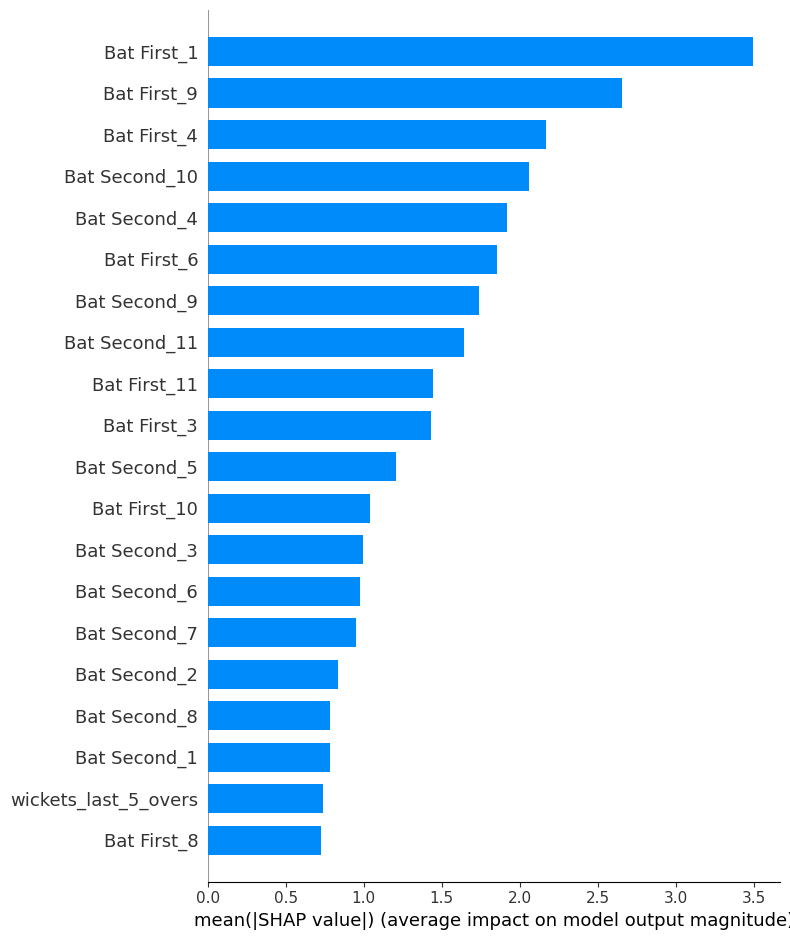

In [80]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

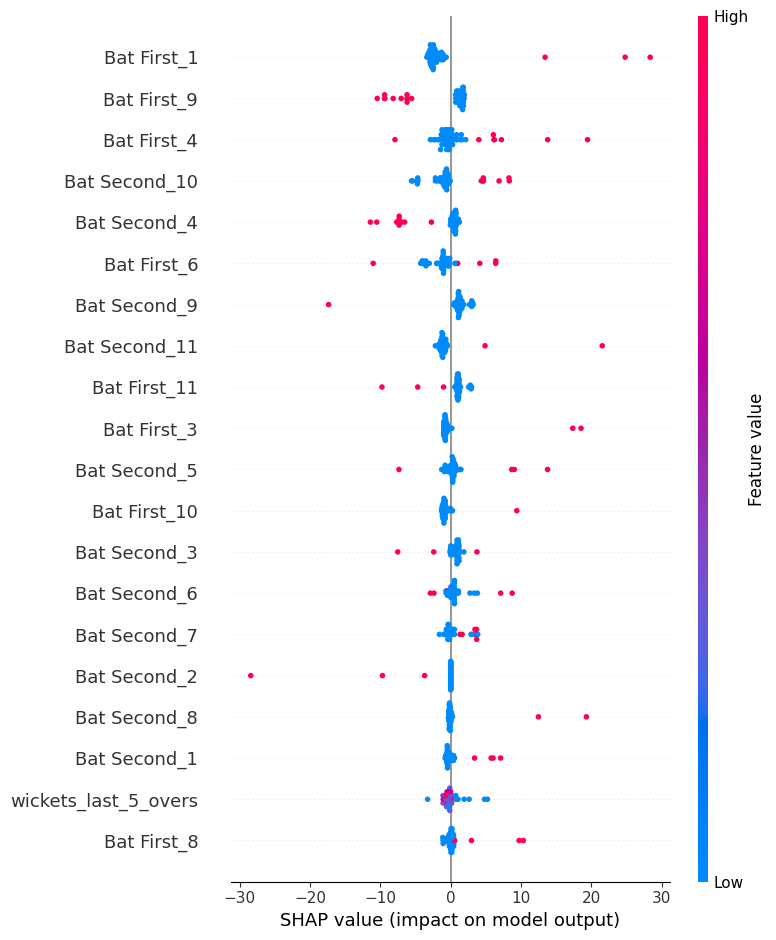

In [81]:
shap.summary_plot(shap_values, X_test[:50])

**b. Linear Regression**

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

The above code initializes a linear regression model and trains it using the provided training data (X_train for features and y_train for the target variable). The model learns the relationships between the features and the target variable, enabling it to make predictions. After training, the model object is ready for making predictions on new data or evaluating its performance.

In [ ]:
df.info()


In [83]:
# Dividing the predictor variables and the target variable

X = df[[
        'Bat First_0', 'Bat First_1', 'Bat First_2', 'Bat First_3', 'Bat First_4',
        'Bat First_5', 'Bat First_6', 'Bat First_7', 'Bat First_8', 'Bat First_9',
        'Bat First_10', 'Bat First_11', 'Bat Second_0', 'Bat Second_1', 'Bat Second_2',
        'Bat Second_3', 'Bat Second_4', 'Bat Second_5', 'Bat Second_6', 'Bat Second_7',
        'Bat Second_8', 'Bat Second_9', 'Bat Second_10', 'Bat Second_11',
        'Innings Runs', 'Innings Wickets','overs', 'runs_last_5_overs','wickets_last_5_overs' ]]

y = df['Target Score']

In [84]:
#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


In [85]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 658878234.55
Coefficient of determination: -555792.54
R^2 score on test set = -555792.5375895242


In [86]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [90]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 894.22
Coefficient of determination: 0.25
R^2 score on test set = 0.24568510494656814


In [91]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Target Score   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     3580.
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:13:59   Log-Likelihood:            -6.2315e+05
No. Observations:              133029   AIC:                         1.246e+06
Df Residuals:                  133001   BIC:                         1.247e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Bat First_0             73.7910      0.385    191.784      0.000      73.037      74.545
Bat First_1             85.8250      0.331    259.639      0.000      85.177      86.473
Bat First_2             68.1870      0.346    197.092      0.000      67.509      68.865
Bat First_3             82.8308      0.330    251.236      0.000      82.185      83.477
Bat First_4             88.8482      0.302    294.662      0.000      88.257      89.439
Bat First_5             56.7833      0.540    105.196      0.000      55.725      57.841
Bat First_6             83.4747      0.309    270.214      0.000      82.869      84.080
Bat First_7             79.9927      0.306    261.810      0.000      79.394      80.592
Bat First_8             79.8663      0.310    257.969      0.000      79.259      80.473
Bat First_9             74.5175      0.314    237.403      0.000      73.902      75.133
Bat First_10            79.1081      0.318    248.756      0.000      78.485      79.731
Bat First_11            68.5533      0.375    182.654      0.000      67.818      69.289
Bat Second_0            80.2475      0.447    179.724      0.000      79.372      81.123
Bat Second_1            68.7795      0.308    223.366      0.000      68.176      69.383
Bat Second_2            80.1606      0.329    243.772      0.000      79.516      80.805
Bat Second_3            75.4703      0.311    242.740      0.000      74.861      76.080
Bat Second_4            71.7033      0.315    227.571      0.000      71.086      72.321
Bat Second_5            82.0685      0.380    216.053      0.000      81.324      82.813
Bat Second_6            77.7241      0.328    236.698      0.000      77.080      78.368
Bat Second_7            73.5545      0.307    239.227      0.000      72.952      74.157
Bat Second_8            70.1606      0.334    209.858      0.000      69.505      70.816
Bat Second_9            74.8081      0.322    232.577      0.000      74.178      75.439
Bat Second_10           77.0261      0.304    253.164      0.000      76.430      77.622
Bat Second_11           90.0748      0.379    237.417      0.000      89.331      90.818
Innings Runs             0.9593      0.005    177.333      0.000       0.949       0.970
Innings Wickets          2.6189      0.066     39.507      0.000       2.489       2.749
overs                   -8.0642      0.053   -151.616      0.000      -8.168      -7.960
runs_last_5_overs        0.1837      0.010     18.697      0.000       0.164       0.203
wickets_last_5_overs    -1.1964      0.092    -13.049      0.000      -1.376      -1.017
==============================================================================
Omnibus:                    17438.522   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62828.13

#SHAP

In [92]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

PermutationExplainer explainer: 14782it [04:45, 50.79it/s]                           


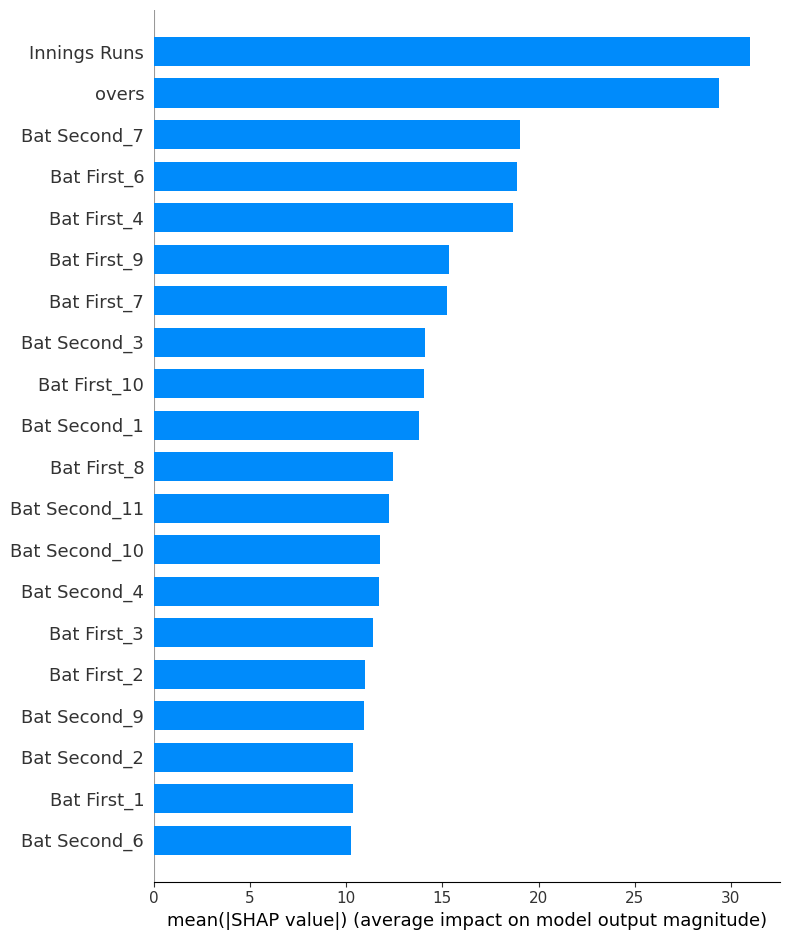

In [93]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

The summary_plot function generates a bar chart visualizing the average magnitude of these SHAP values for each feature, providing insights into the relative importance of features in influencing the model's predictions. Positive values indicate features contributing to higher predictions, while negative values impact predictions negatively.

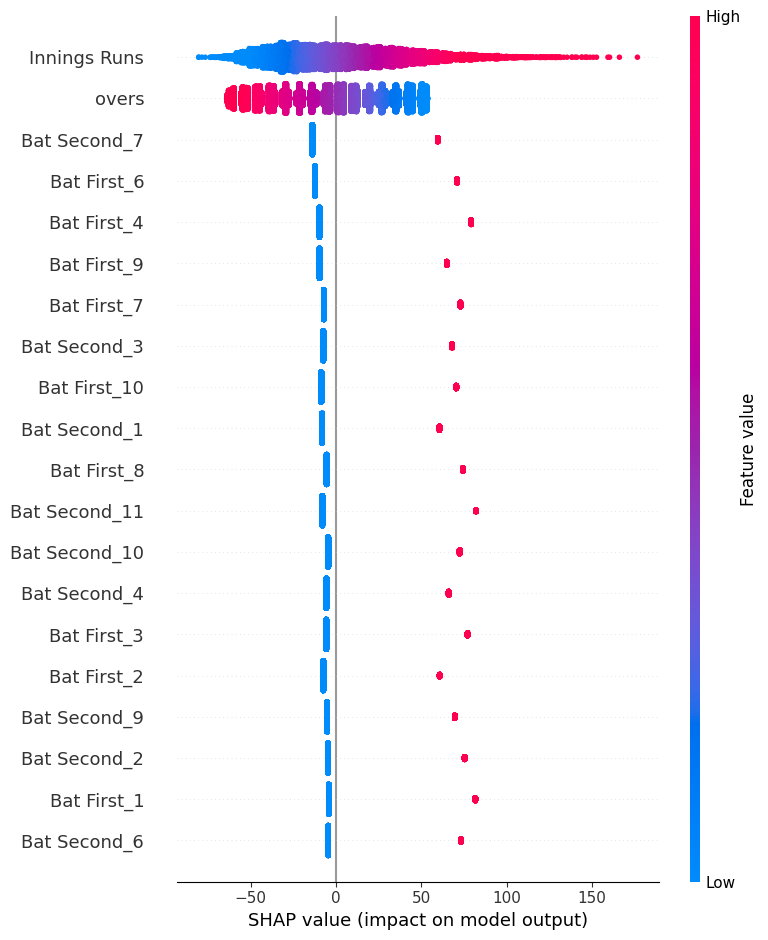

In [94]:
shap.summary_plot(shap_values, X_test)

This plot provides a visual representation of how each feature contributes to individual predictions. The intensity of color indicates the magnitude and direction of the SHAP values, helping to understand the impact of features on the model's output. Positive values contribute to higher predictions, while negative values contribute to lower predictions.

**Partial Dependence Plots**

In [95]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            model.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature,
            model.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

The partial_dependence_plot function is designed to generate partial dependence plots using SHAP values. If idx is None, it visualizes the partial dependence for all samples using shap.plots.partial_dependence. If idx is provided, it specifically visualizes the partial dependence for the sample at index idx using shap.partial_dependence_plot. The plots help understand the effect of a single feature on the model's predictions, considering either all samples or a specific one. The function leverages SHAP values previously computed for the model (model) on the training data (X_train).

In [ ]:
df.info()


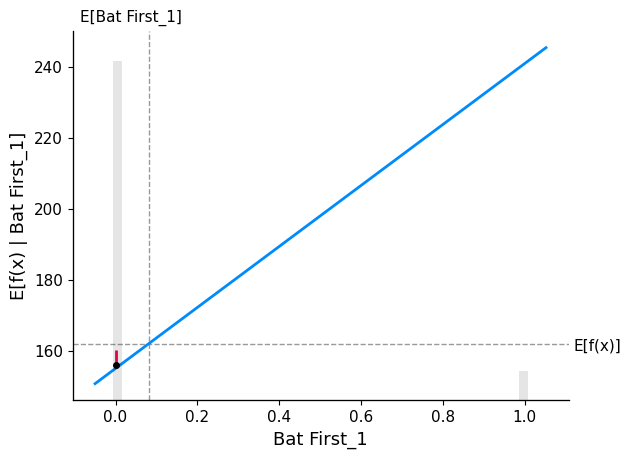

In [96]:
partial_dependence_plot('Bat First_1', 0)

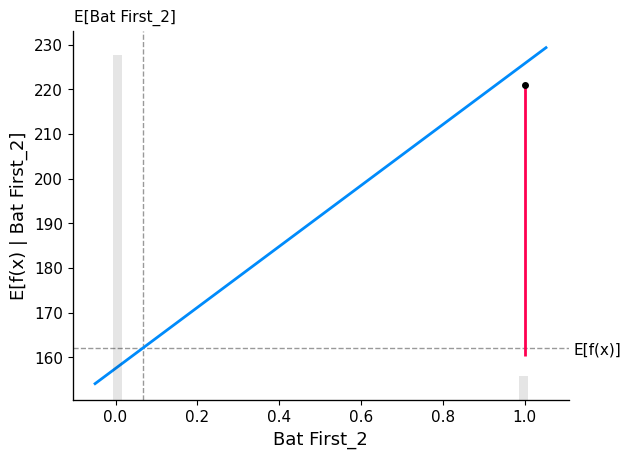

In [97]:
partial_dependence_plot('Bat First_2', 0)

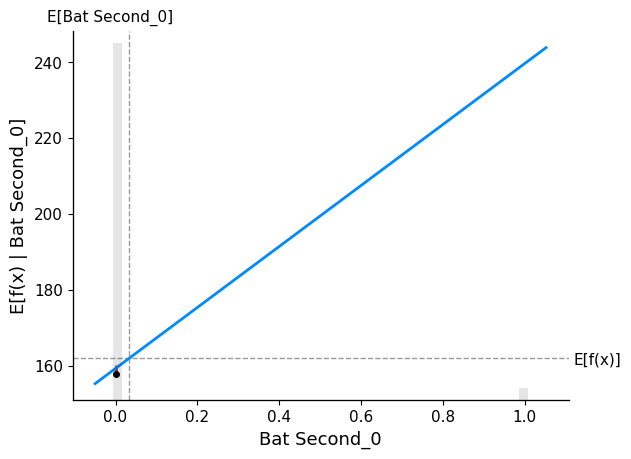

In [98]:
partial_dependence_plot('Bat Second_0', 0)

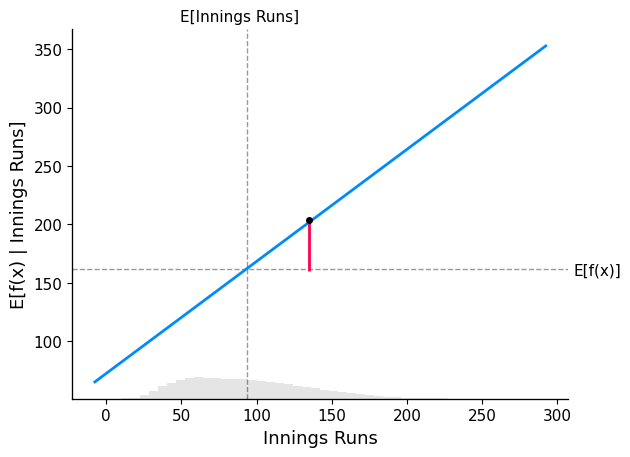

In [99]:
partial_dependence_plot('Innings Runs', 0)

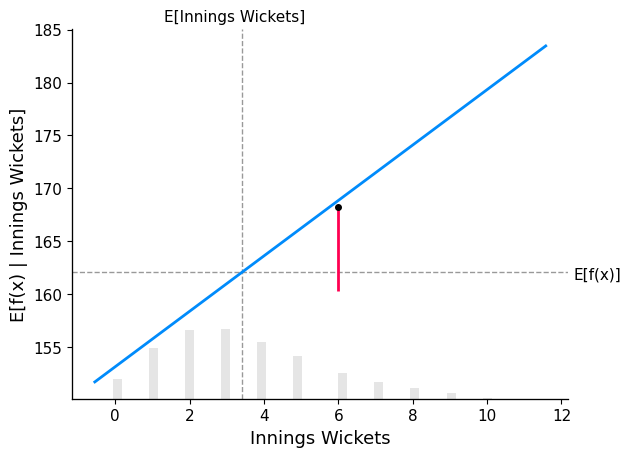

In [100]:
partial_dependence_plot('Innings Wickets', 0)

#SHAP

In [102]:
explainer = shap.Explainer(model.predict, X_train)

In [103]:
subset_fraction = 0.1
subset_indices = np.random.choice(X_test.index, size=int(len(X_test) * subset_fraction), replace=False)
X_test_subset = X_test.loc[subset_indices]

I am a creating a subset of the test set here because it was taking very long to test on the whole test set

In [104]:
shap_values_subset = explainer(X_test_subset)

PermutationExplainer explainer: 1479it [00:36, 31.96it/s]                          


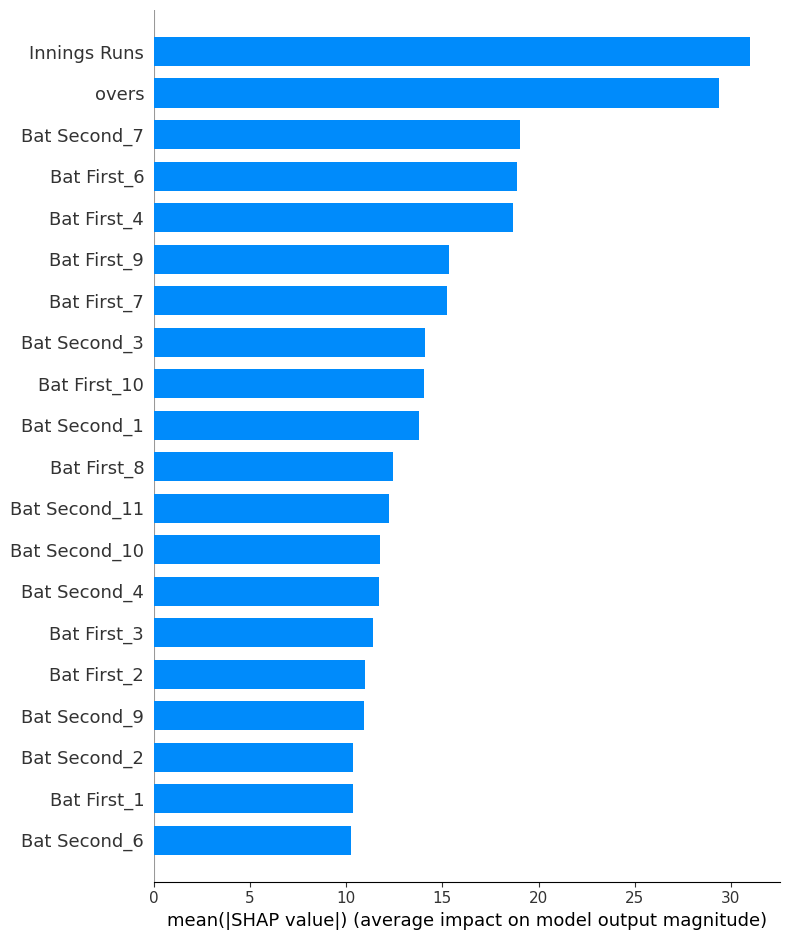

In [105]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

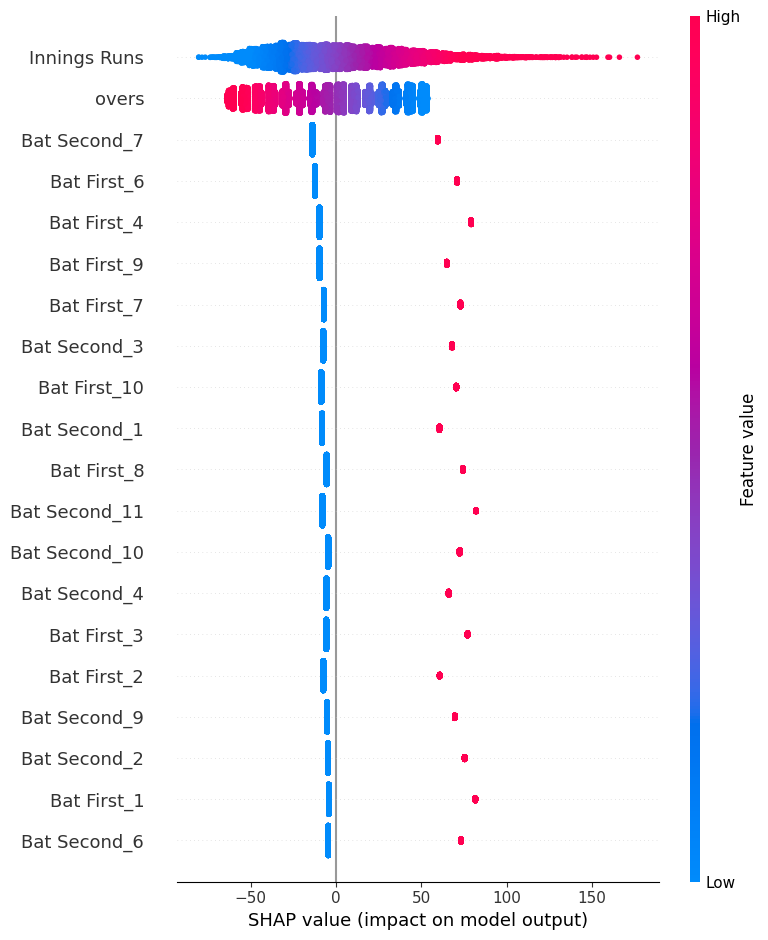

In [106]:
shap.summary_plot(shap_values, X_test)

### **1. What is the question?**
The assignment aims to predict Survival rate based on various factors using machine learning techniques. Specifically, the objective is to develop models capable of accurately classifying individuals as either surviving or not, leveraging attributes such as age, sex, passenger class, number of siblings/spouses aboard, fare, and embarkation port.

### **2. What did you do?**
- **Data Preprocessing and Feature Selection**:
  - Conducted data cleaning to handle missing values and dropped irrelevant features.
  - Applied one-hot encoding to categorical variables and performed data preprocessing including normalization and correlation analysis.
  
- **Modeling (AutoML)**:
  - Split the data into training and test sets, setting up target and predictor variables.
  - Utilized H2O AutoML for modeling, which efficiently identified the best-performing model, Gradient Boosting Machine (GBM), achieving a  RMSE of 9.09.
  
- **Model Interpretability**:
  - Employed SHAP to interpret the GBM model's predictions, providing insights into feature importance and contributing to understanding the model's decision-making process.
  - Reported model evaluation metrics on the test data and visualized model interpretations using summary plots, partial dependence plots, and random forest plots.
  
- **Linear Regression**:
  - Additionally, linear regression (OLS) was used as an alternative modeling technique, splitting the data into training and test sets, and training the model.

### **3. How well did it work?**
- The AutoML technique efficiently identified the best-performing model (GBM) for predicting survival rate, achieving a low RMSE of 0.0555.
- Model interpretability techniques such as SHAP provided valuable insights into feature importance, aiding in understanding the model's predictions.
- Linear regression (OLS) served as an alternative modeling approach, providing additional insights into the relationship between predictors and survival rate.

### **4. What did you learn?**
- The importance of data preprocessing, feature selection, and model evaluation in building predictive models for survival rate prediction.
- AutoML techniques can effectively identify the best-performing model, saving time and effort in model selection.
- Model interpretability techniques like SHAP are crucial for understanding the underlying factors influencing predictions and gaining insights into model behavior.
- Employing multiple modeling techniques and interpretability methods enhances the understanding and robustness of predictive models for survival rate prediction.

# # LICENSE
# MIT License
#
# Copyright (c) 2022 Somesh Banerjee
#
# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# # REFERENCES
# H20.ai- https://docs.h2o.ai/
# OLS Model- http://net-informations.com/ds/mla/ols.html
# Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/
# Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/
# Kaggle Notebook- https://www.kaggle.com/datasets/jamiewelsh2/ball-by-ball-it20/data
# Dataset- https://www.kaggle.com/datasets/jamiewelsh2/ball-by-ball-it20/data
# Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML
